In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import matplotlib.ticker as ticker
import dateparser
from scipy.interpolate import make_interp_spline
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

C:\Users\SILA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  

In [3]:
path1 = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\04_Data_Time_Series\\Data", "product_adjusted_periodic_sentiment.csv") 

df_product_periodic = pd.read_csv(path1)

df_product_periodic.head(10)

Ürün Adı  \
0                Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006   
1                Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006   
2                Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006   
3  TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159   
4  TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159   
5  TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159   
6  TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159   
7  TRENDYOLMİLLA Altın Vücuda Oturan Örme Parıltılı Pullu Örme Payet Şık Abiye Elbise TPRSS24EL00030   
8  TRENDYOLMİLLA Altın Vücuda Oturan Örme Parıltılı Pullu Örme Payet Şık Abiye Elbise TPRSS24EL00030   
9  TRENDYOLMİLLA Altın Vücuda Oturan Örme Parıltılı Pullu Örme Payet Şık Abiye Elbise TPRSS24EL00030   

  Yıl_Ay_Min Yıl_Ay_Max  Olumlu Yorum Sayısı  Toplam Yorum Sayısı  \
0    2024-08    2024-10                    9                   13   
1    2024-11    2025-01                   44                   62   
2    2025-02    2025-03                    9                   15   
3    2023-09    2024-02                   33                   37   
4    2024-03    2024-09                   10                   12   
5    2024-10    2024-12                   31                   49   
6    2025-01    2025-02                   11                   13   
7    2024-03    2024-05                   34                   40   
8    2024-06    2024-11                   24                   26   
9    2024-12    2025-03                   16                   19   

   Olumlu Oranı  
0      0.692308  
1      0.709677  
2      0.600000  
3      0.891892  
4      0.833333  
5      0.632653  
6      0.846154  
7      0.850000  
8      0.923077  
9      0.842105

In [4]:
path2 = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\04_Data_Time_Series\\Data", "product_trend_diff.csv") 

df_trend_diff = pd.read_csv(path2)

df_trend_diff.head(10)

Ürün Adı  \
0                                            TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243   
1                                  Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563   
2                                       Trendyol Curve Kahverengi Büzgü Detaylı Midi Örme Elbise TBBSS24AH00080   
3                       TRENDYOLMİLLA Beyaz Skater/Belden Açılan Brode Mini Astarlı Dokuma Elbise TWOSS21EL3680   
4                       TRENDYOLMİLLA Beyaz A Kesim Yaka Detaylı Brode Mini Astarlı Dokuma Elbise TWOSS21EL2089   
5  TRENDYOLMİLLA Çok Renkli Ayarlanabilir Askılı Baskılı Askılı Bürümcük/Dokulu Örme Midi Elbise TWOSS24EL00401   
6                                      TRENDYOLMİLLA Siyah Mini Triko Pileli Etek Detaylı Elbise TWOAW24EL00013   
7                     TRENDYOLMİLLA Siyah Eteği Volanlı A Kesim Şifon Midi Astarlı Dokuma Elbise TWOSS22EL00733   
8                                                    TRENDYOLMİLLA Haki Gömlek Yaka Dokuma Elbise TWOAW21EL1964   
9                                        TRENDYOLMİLLA Beyaz Dokuma %100 Pamuk Mini Plaj Elbisesi TBESS21EL3979   

  İlk Dönem Son Dönem  İlk Skor  Son Skor   Değişim  Mutlak_Değişim  
0   2022-03   2025-01  0.928571  0.400000 -0.528571        0.528571  
1   2023-01   2025-01  0.333333  0.833333  0.500000        0.500000  
2   2024-03   2025-03  0.400000  0.884615  0.484615        0.484615  
3   2022-03   2024-10  0.920000  0.500000 -0.420000        0.420000  
4   2022-04   2025-03  0.948718  0.533333 -0.415385        0.415385  
5   2024-02   2025-02  1.000000  0.588235 -0.411765        0.411765  
6   2023-08   2025-03  0.848485  0.454545 -0.393939        0.393939  
7   2022-05   2024-08  0.975000  0.600000 -0.375000        0.375000  
8   2022-03   2025-02  0.863636  0.500000 -0.363636        0.363636  
9   2022-03   2025-02  0.944444  0.595238 -0.349206        0.349206

Prophet

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logit(p):

    eps = 1e-6
    p = np.clip(p, eps, 1 - eps)
    return np.log(p / (1 - p))

def prophet_logit_tahmin_3ay(df_product_periodic, urun_adi):
    df_urun = df_product_periodic[df_product_periodic["Ürün Adı"] == urun_adi].reset_index(drop=True)
    df_urun['Yıl_Ay_Min_dt'] = pd.to_datetime(df_urun['Yıl_Ay_Min'], format='%Y-%m')
    df_urun['Yıl_Ay_Max_dt'] = pd.to_datetime(df_urun['Yıl_Ay_Max'], format='%Y-%m')

    x_dates = df_urun['Yıl_Ay_Min_dt'].tolist()
    x_dates[-1] = df_urun['Yıl_Ay_Max_dt'].iloc[-1]

    labels = df_urun['Yıl_Ay_Min'].tolist()
    labels[-1] = df_urun['Yıl_Ay_Max'].iloc[-1]

    skor_listesi = df_urun['Olumlu Oranı'].tolist()


    y_logit = logit(np.array(skor_listesi))

    df_prophet = pd.DataFrame({'ds': x_dates, 'y': y_logit})

    m = Prophet(interval_width=0.95, changepoint_prior_scale=0.05)
    m.fit(df_prophet)

    future = m.make_future_dataframe(periods=3, freq='Q')
    forecast = m.predict(future)


    forecast['yhat'] = sigmoid(forecast['yhat'])
    forecast['yhat_lower'] = sigmoid(forecast['yhat_lower'])
    forecast['yhat_upper'] = sigmoid(forecast['yhat_upper'])

    tarih_son_gercek = df_prophet['ds'].max()
    forecast_tahmin = forecast[forecast['ds'] > tarih_son_gercek]

    tahmin_dates = forecast_tahmin['ds'].tolist()
    tahmin_labels = [d.strftime('%Y-%m') for d in tahmin_dates]

    all_dates = x_dates + tahmin_dates
    all_labels = labels + tahmin_labels

    plt.figure(figsize=(12,6))


    plt.plot(x_dates, skor_listesi, marker='o', color='blue', label='Gerçek Değerler')

    plt.plot(tahmin_dates, forecast_tahmin['yhat'], marker='o', color='orange', label='Tahmin Değerleri')

    for x in all_dates:
        plt.axvline(x=x, color='gray', linestyle='-', linewidth=0.7)

    plt.xticks(all_dates, all_labels, rotation=45)


    min_y = min(min(skor_listesi), min(forecast_tahmin['yhat']))
    max_y = max(max(skor_listesi), max(forecast_tahmin['yhat']))
    plt.ylim(min_y - 0.05, max_y + 0.05)

    plt.title(f"Olumlu Oran Zaman Serisi ve 3 Ay Tahmin (Logit + Prophet) - {urun_adi}")
    plt.xlabel("Dönem (Yıl-Ay)")
    plt.ylabel("Olumlu Oranı")
    plt.legend()
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


Ürün: TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243


22:55:20 - cmdstanpy - INFO - Chain [1] start processing
22:55:21 - cmdstanpy - INFO - Chain [1] done processing


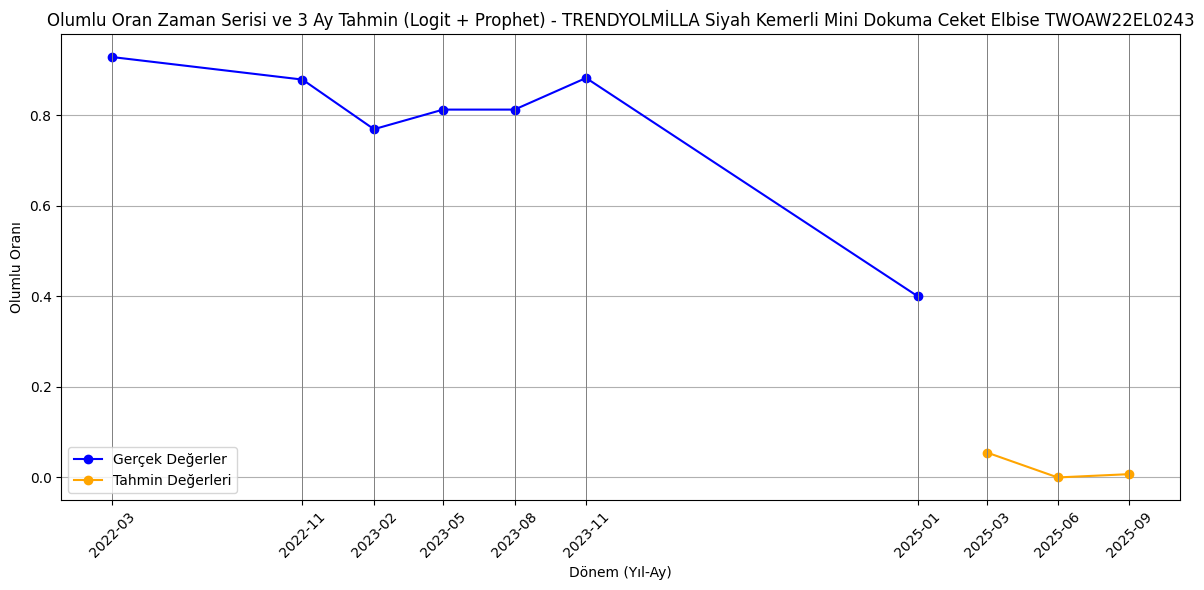

22:55:21 - cmdstanpy - INFO - Chain [1] start processing


Ürün: Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563


22:55:22 - cmdstanpy - INFO - Chain [1] done processing


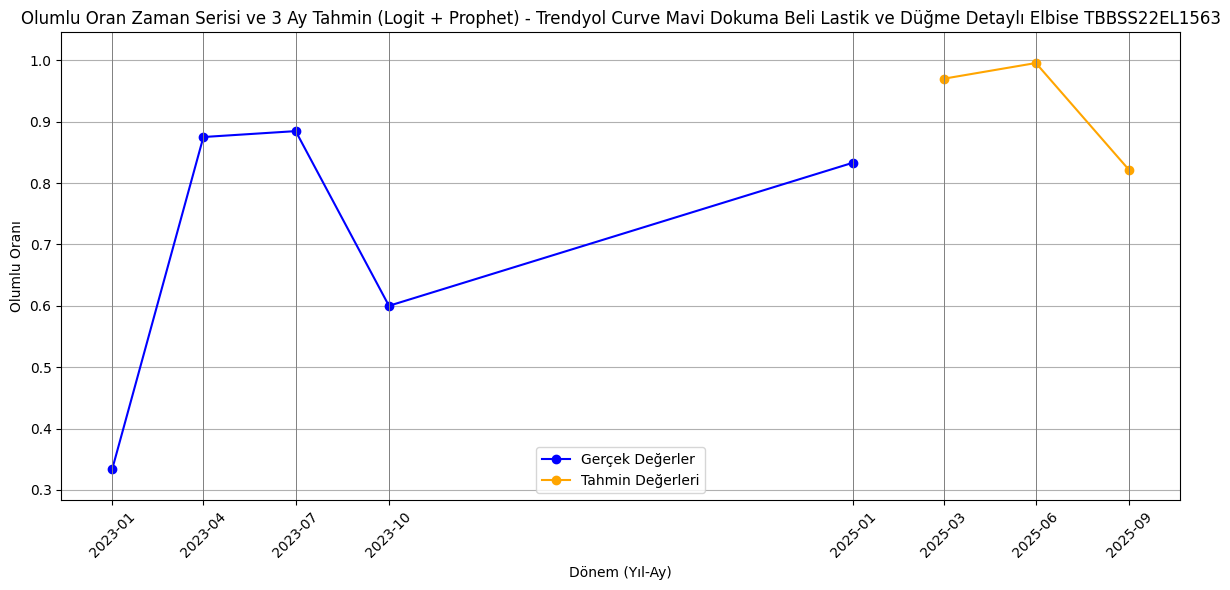

22:55:22 - cmdstanpy - INFO - Chain [1] start processing
22:55:22 - cmdstanpy - INFO - Chain [1] done processing


Ürün: Trendyol Curve Kahverengi Büzgü Detaylı Midi Örme Elbise TBBSS24AH00080


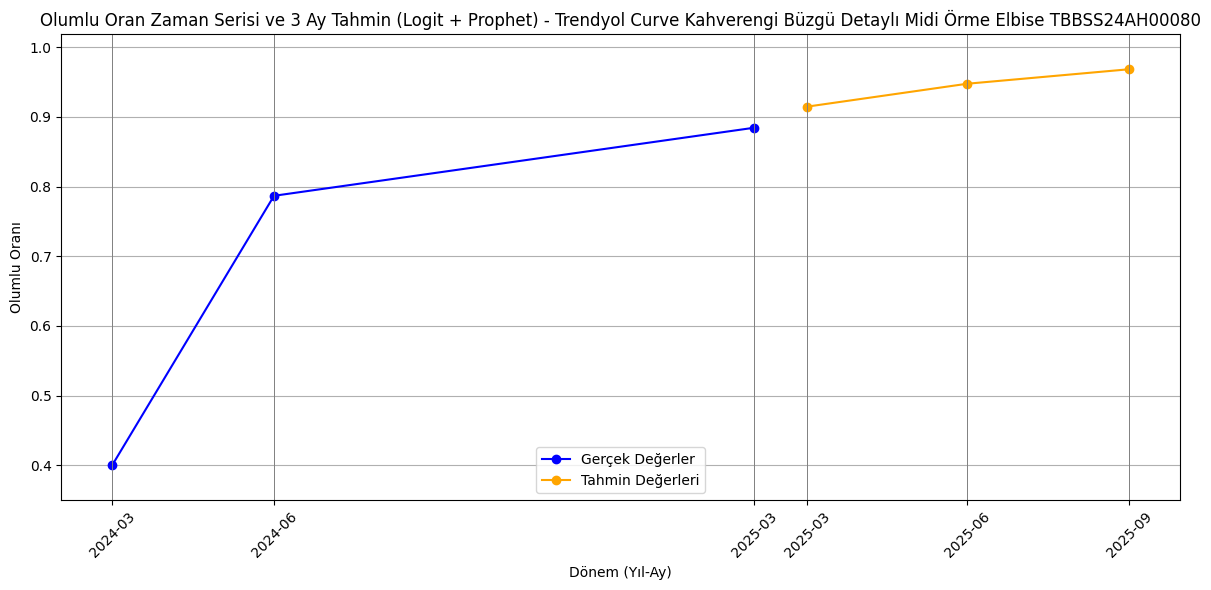

22:55:22 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Beyaz Skater/Belden Açılan Brode Mini Astarlı Dokuma Elbise TWOSS21EL3680


22:55:23 - cmdstanpy - INFO - Chain [1] done processing


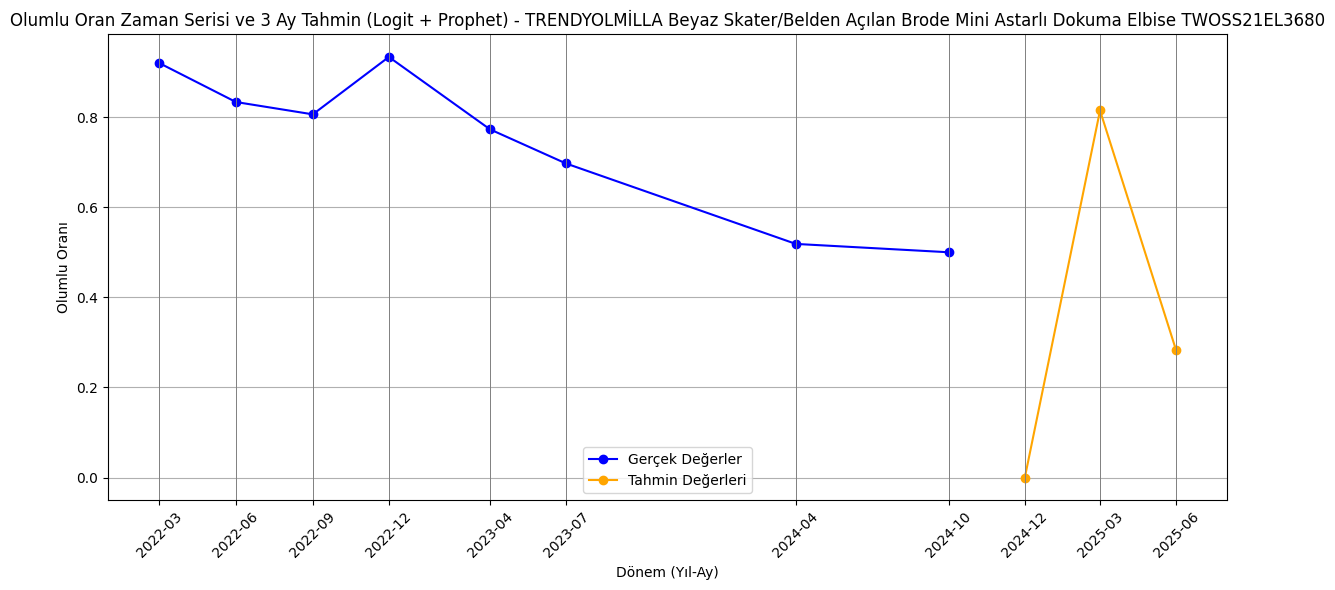

22:55:23 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Beyaz A Kesim Yaka Detaylı Brode Mini Astarlı Dokuma Elbise TWOSS21EL2089


22:55:24 - cmdstanpy - INFO - Chain [1] done processing


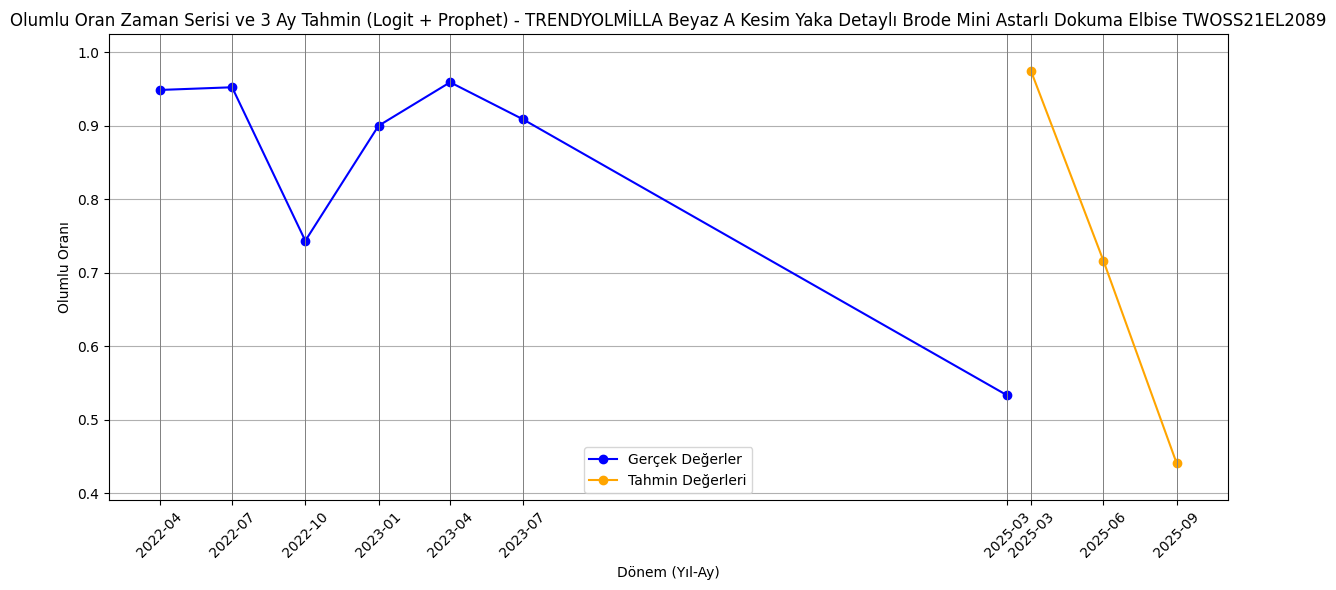

22:55:24 - cmdstanpy - INFO - Chain [1] start processing
22:55:24 - cmdstanpy - INFO - Chain [1] done processing


Ürün: TRENDYOLMİLLA Çok Renkli Ayarlanabilir Askılı Baskılı Askılı Bürümcük/Dokulu Örme Midi Elbise TWOSS24EL00401


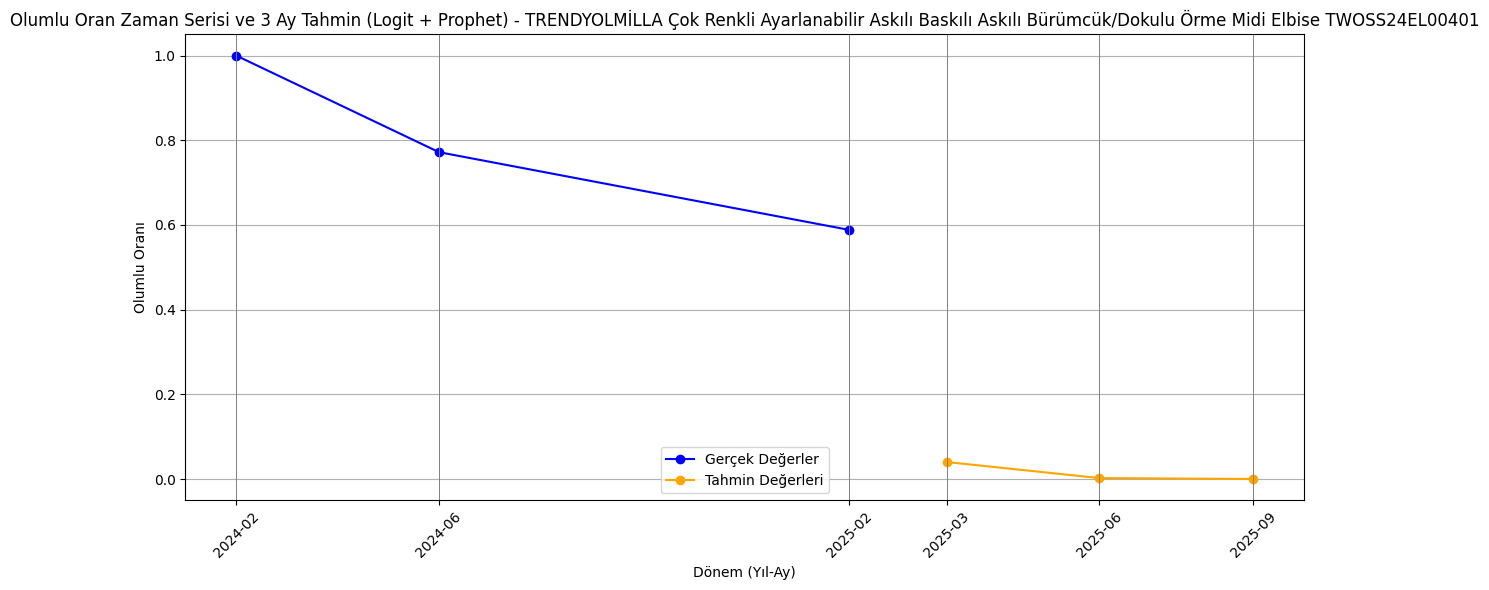

22:55:25 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Siyah Mini Triko Pileli Etek Detaylı Elbise TWOAW24EL00013


22:55:25 - cmdstanpy - INFO - Chain [1] done processing


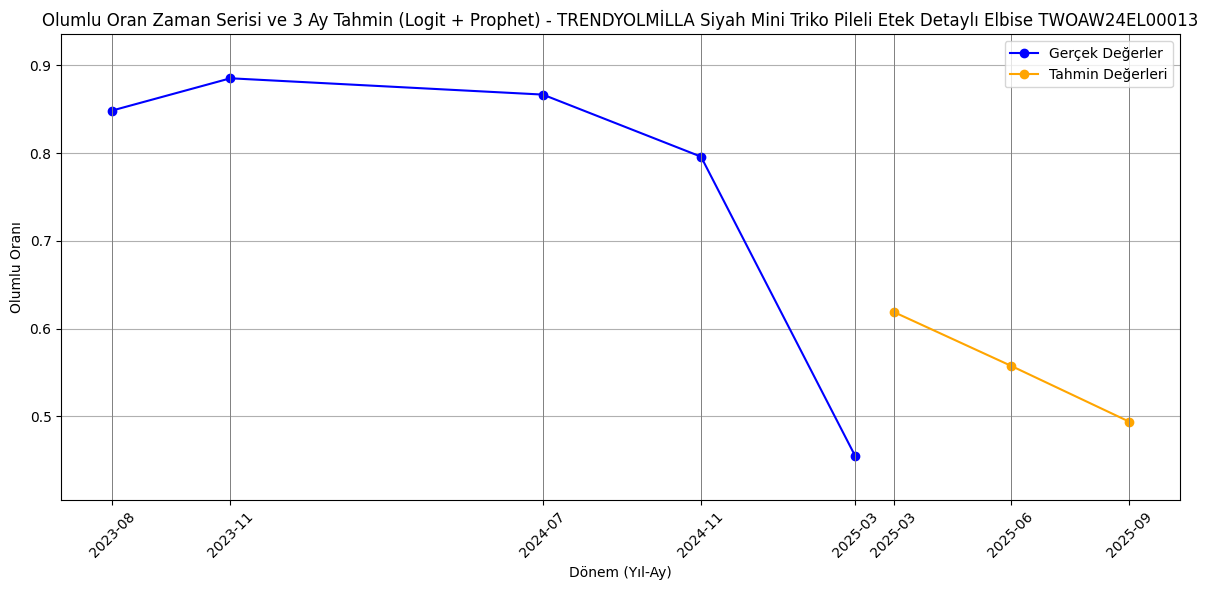

22:55:25 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Siyah Eteği Volanlı A Kesim Şifon Midi Astarlı Dokuma Elbise TWOSS22EL00733


22:55:25 - cmdstanpy - INFO - Chain [1] done processing


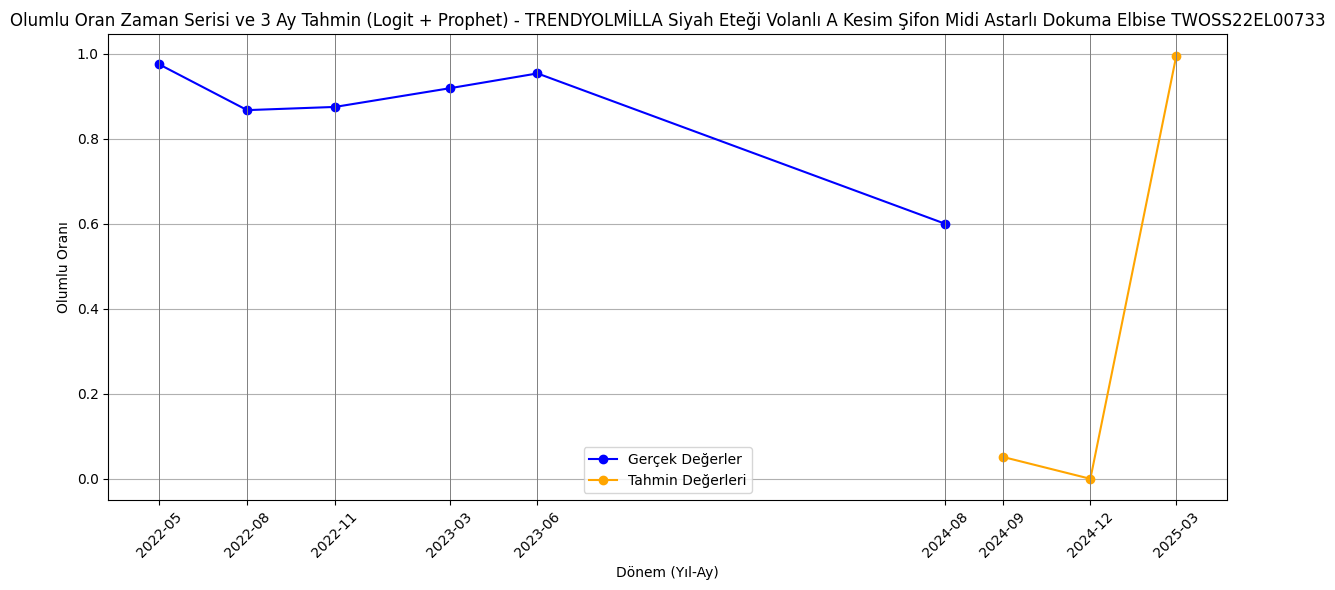

22:55:26 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Haki Gömlek Yaka Dokuma Elbise TWOAW21EL1964


22:55:26 - cmdstanpy - INFO - Chain [1] done processing


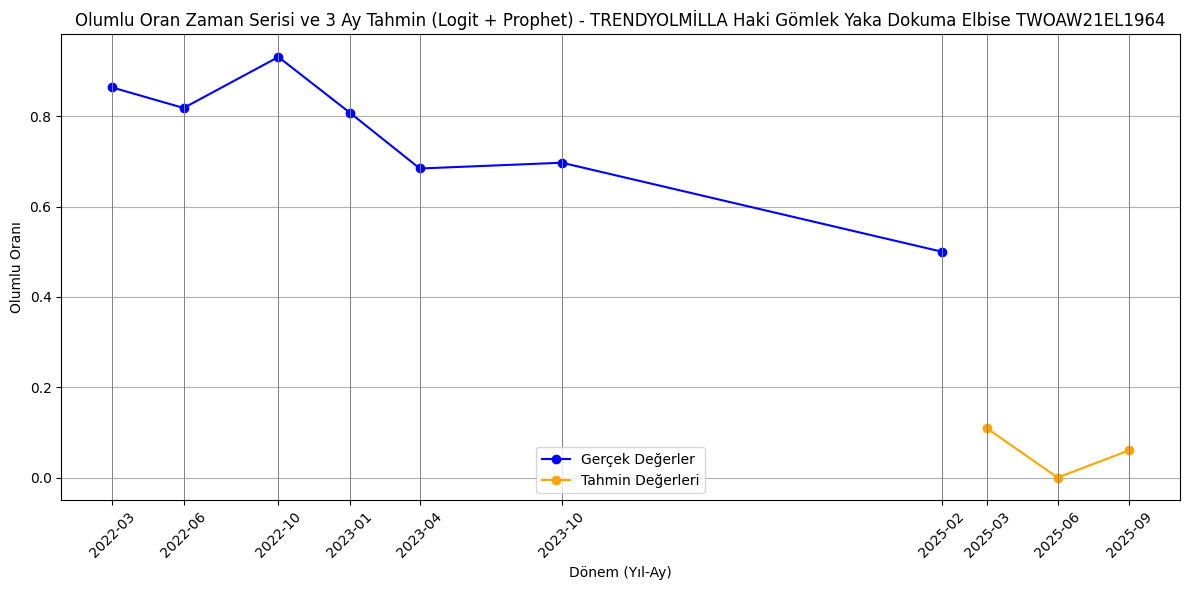

22:55:27 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Beyaz Dokuma %100 Pamuk Mini Plaj Elbisesi TBESS21EL3979


22:55:27 - cmdstanpy - INFO - Chain [1] done processing


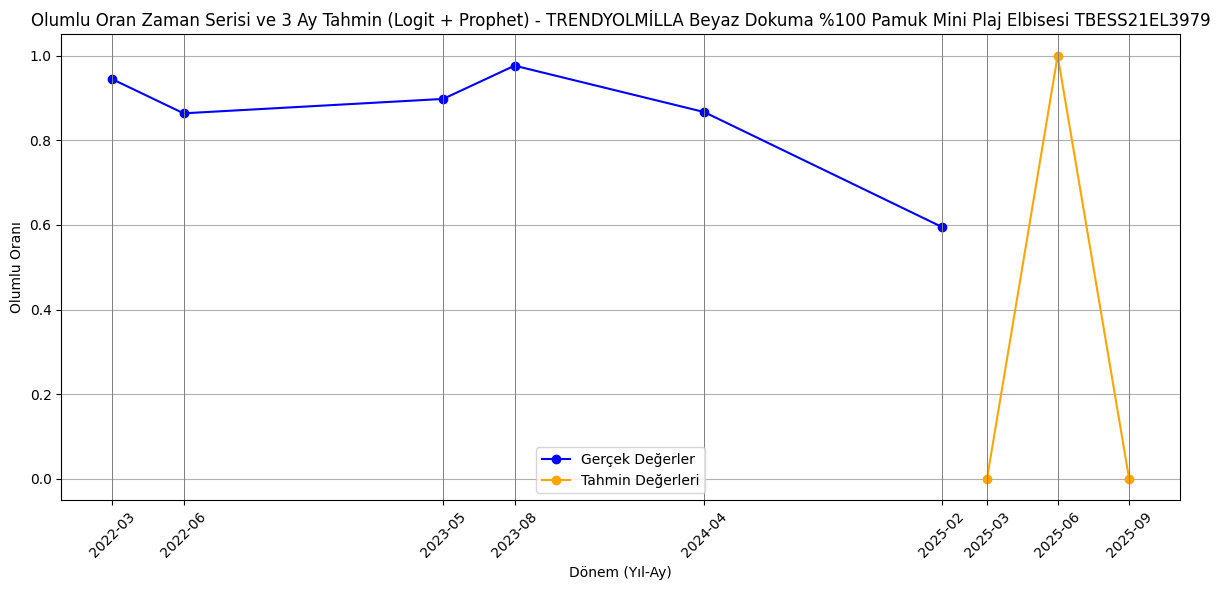

22:55:27 - cmdstanpy - INFO - Chain [1] start processing


Ürün: Trendyol Curve Koyu Mavi Kuşak Detaylı Mini Denim Gömlek Elbise TBBSS24AH00124


22:55:28 - cmdstanpy - INFO - Chain [1] done processing


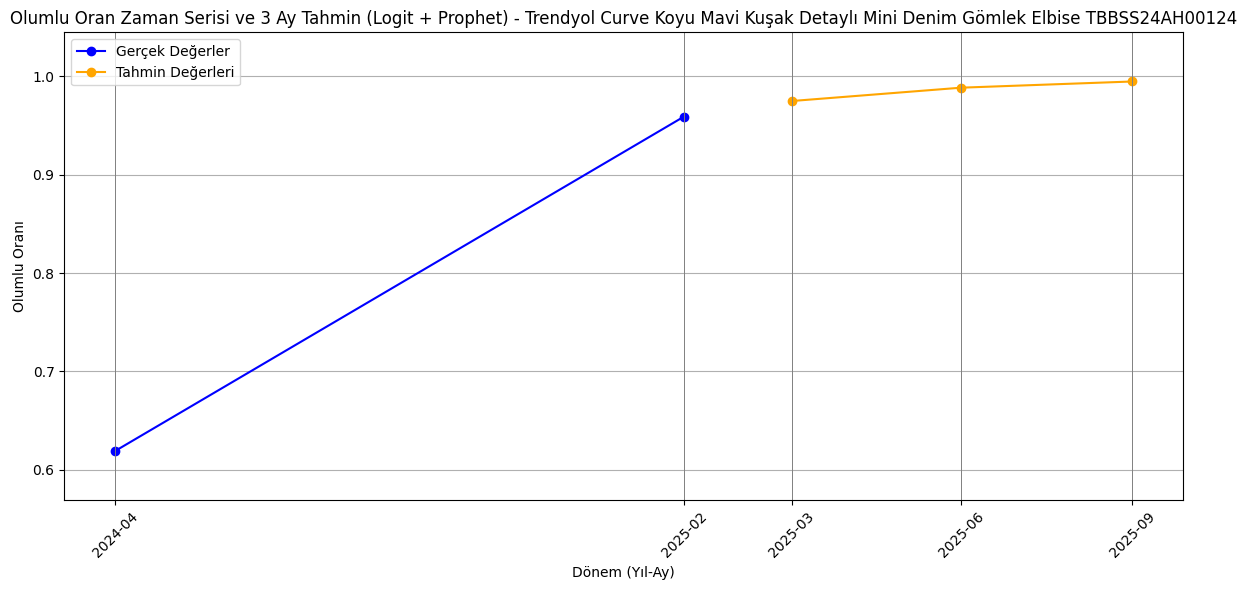

22:55:29 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Taş Kuşaklı A Kesim Mini Kruvaze Yaka Dokuma Keten Görünümlü Elbise TWOSS19XN0008


22:55:29 - cmdstanpy - INFO - Chain [1] done processing


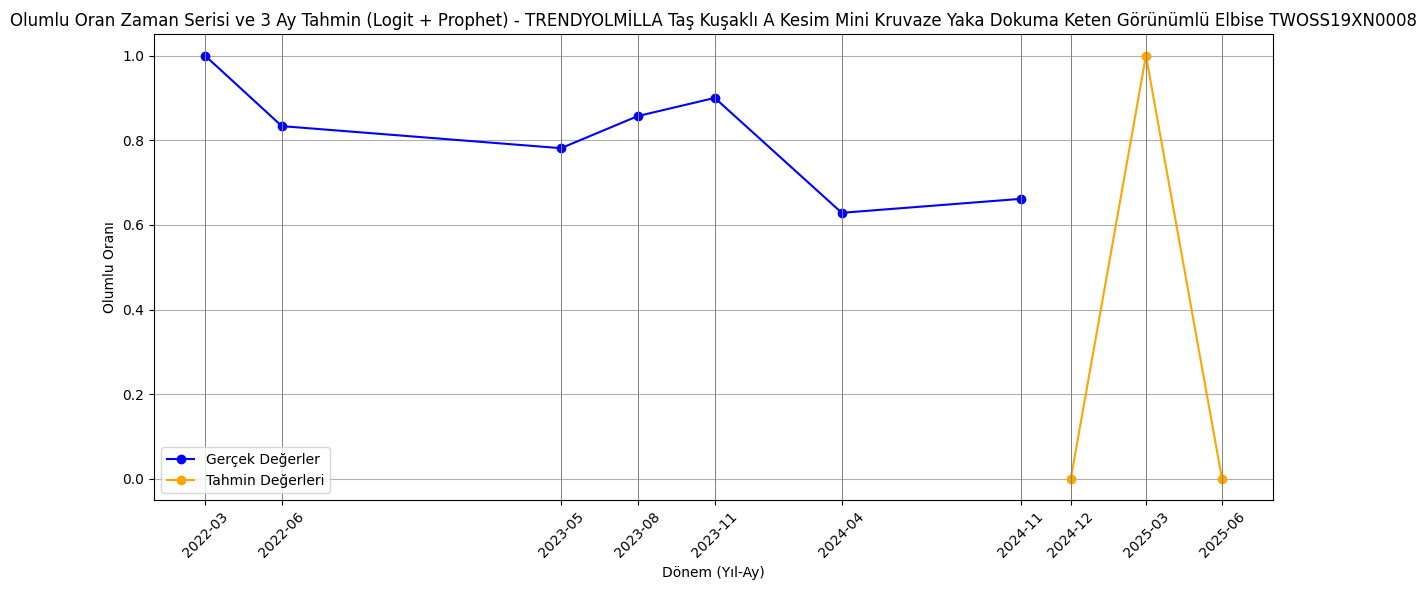

22:55:29 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Lacivert Kuşaklı Yırtmaçlı Çiçek Desenli Midi Dokuma Gömlek Elbise TWOSS20EL2822


22:55:32 - cmdstanpy - INFO - Chain [1] done processing


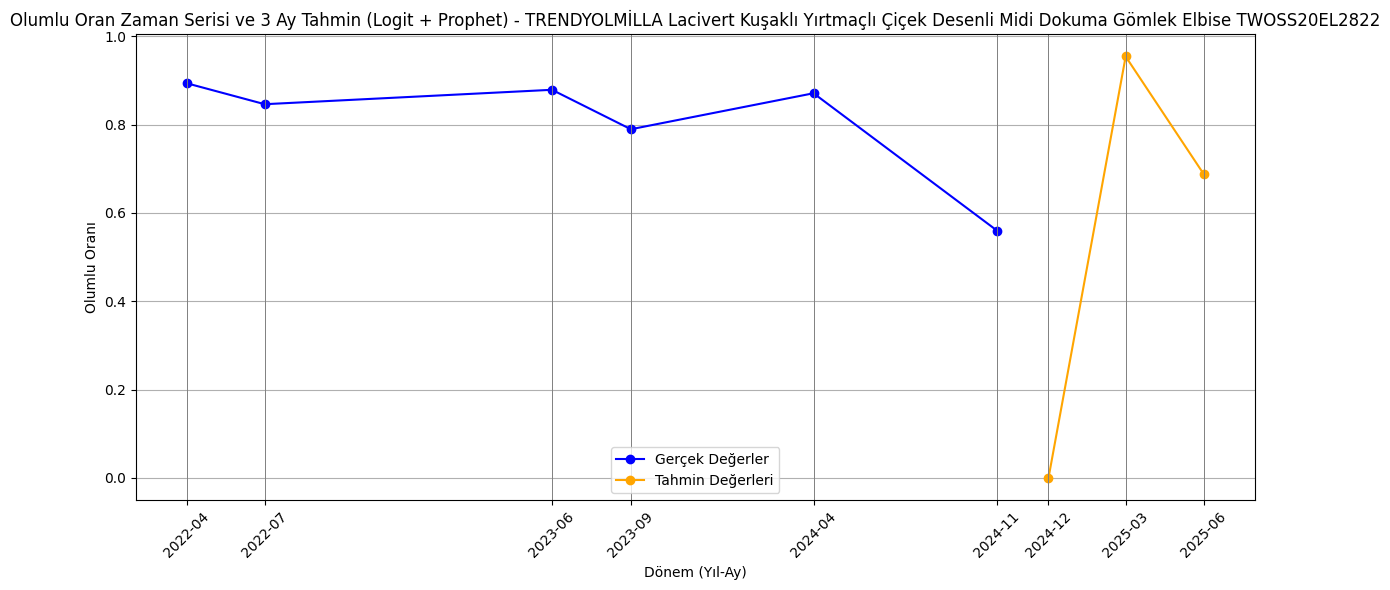

22:55:33 - cmdstanpy - INFO - Chain [1] start processing
22:55:33 - cmdstanpy - INFO - Chain [1] done processing


Ürün: TRENDYOLMİLLA Siyah Vücuda Oturan Gipeli Mini Dokuma Elbise TWOSS23EL00892


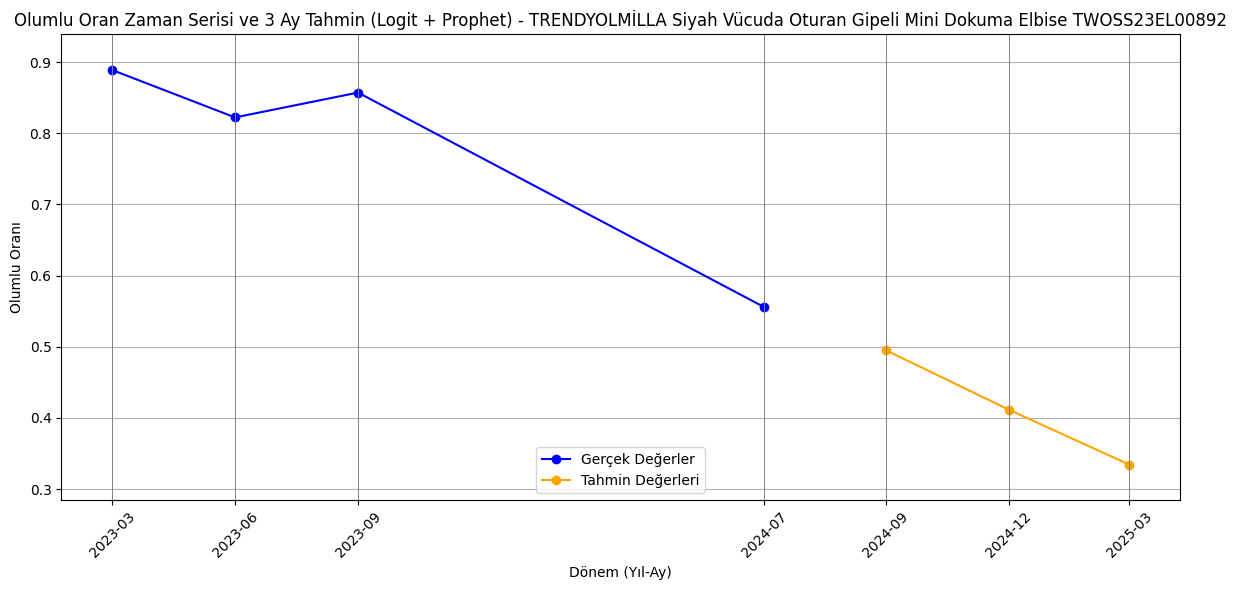

22:55:33 - cmdstanpy - INFO - Chain [1] start processing
22:55:33 - cmdstanpy - INFO - Chain [1] done processing


Ürün: TRENDYOLMİLLA Çok Renkli Çiçek Desenli Belden Açılan Mini Astarlı Şifon Dokuma Elbise TWOAW24EL00841


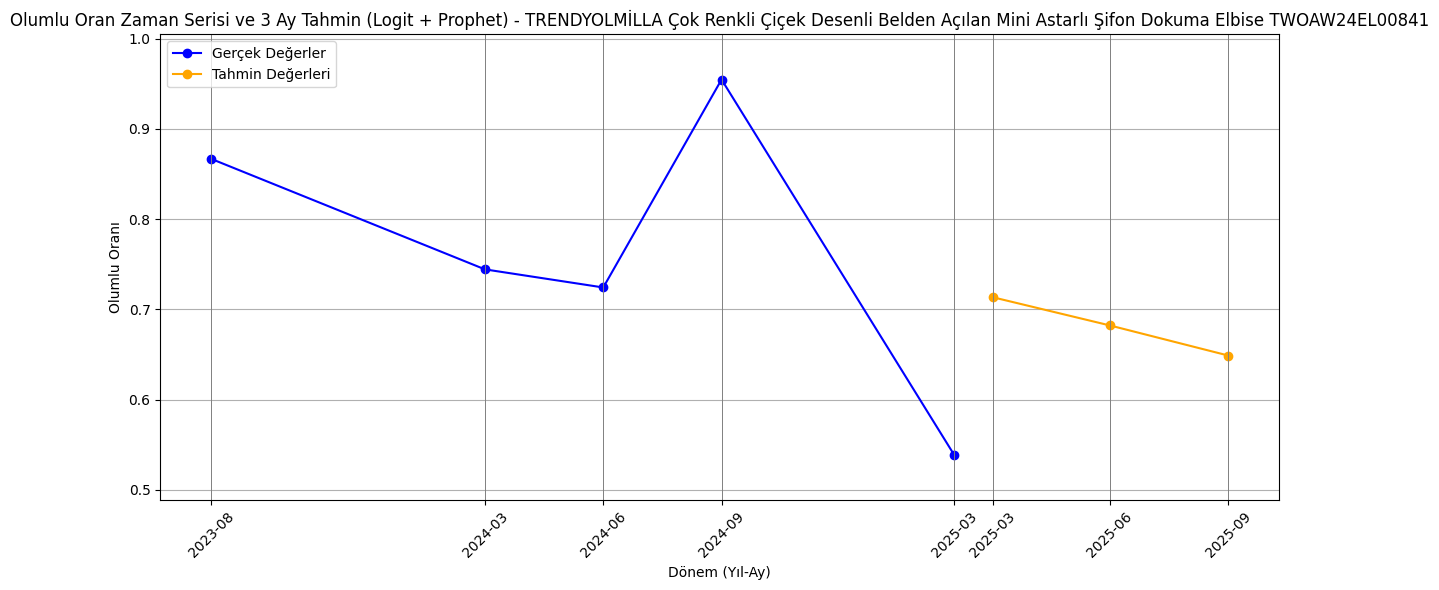

22:55:34 - cmdstanpy - INFO - Chain [1] start processing
22:55:34 - cmdstanpy - INFO - Chain [1] done processing


Ürün: TRENDYOLMİLLA Mavi Çiçek Desenli A Kesim Volanlı Astarlı Midi Dokuma Elbise TWOSS20EL0894


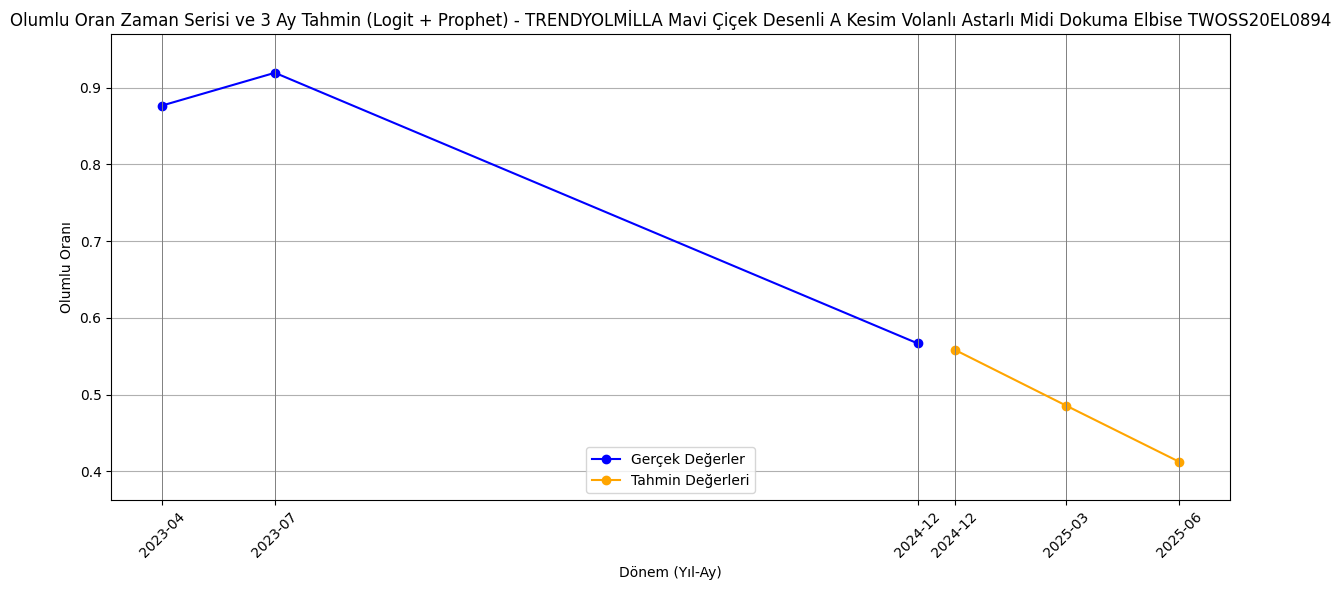

22:55:34 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488


22:55:34 - cmdstanpy - INFO - Chain [1] done processing


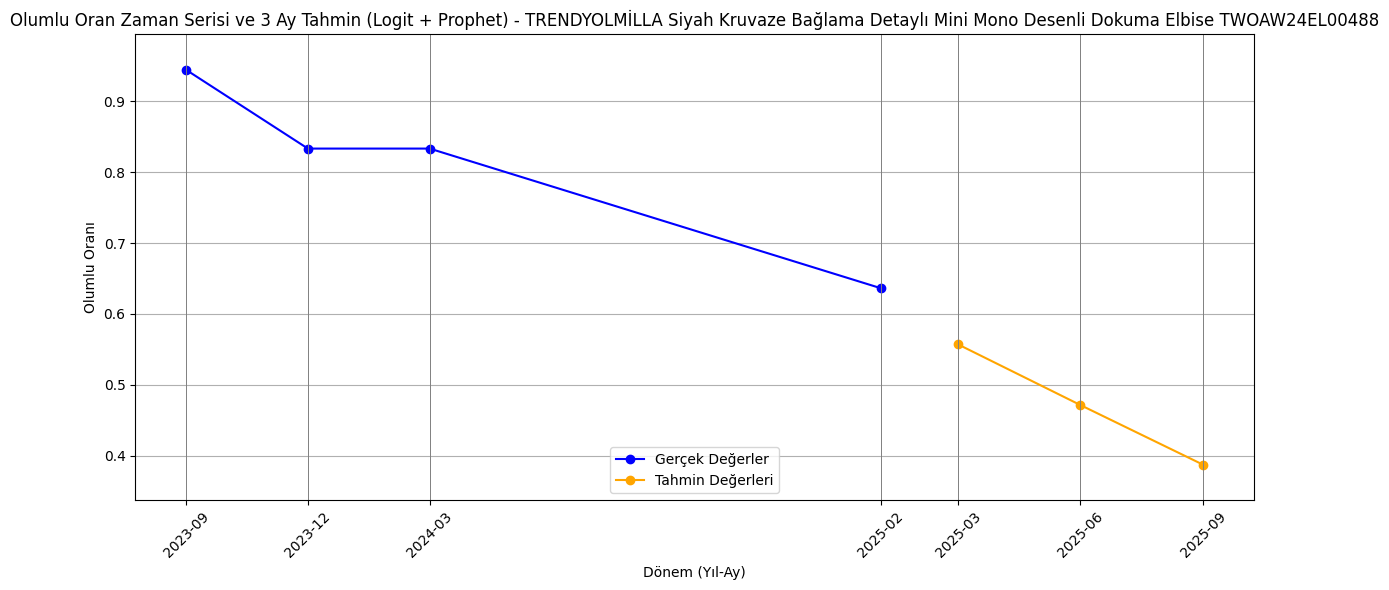

22:55:35 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Siyah Düğme Detaylı Kolsuz Dokuma Mini Ceket Elbise TWOSS19AP0280


22:55:35 - cmdstanpy - INFO - Chain [1] done processing


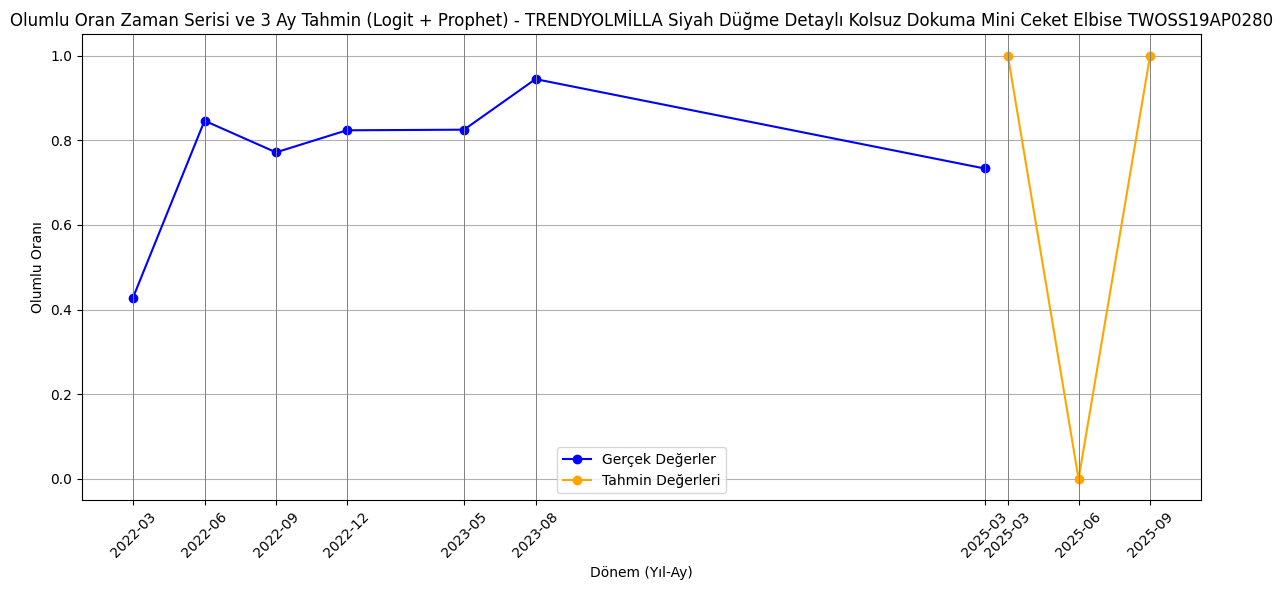

22:55:35 - cmdstanpy - INFO - Chain [1] start processing


Ürün: TRENDYOLMİLLA Limited Edition Pembe Kareli Midi Dokuma Ceket Elbise TWOSS21EL3581


22:55:35 - cmdstanpy - INFO - Chain [1] done processing


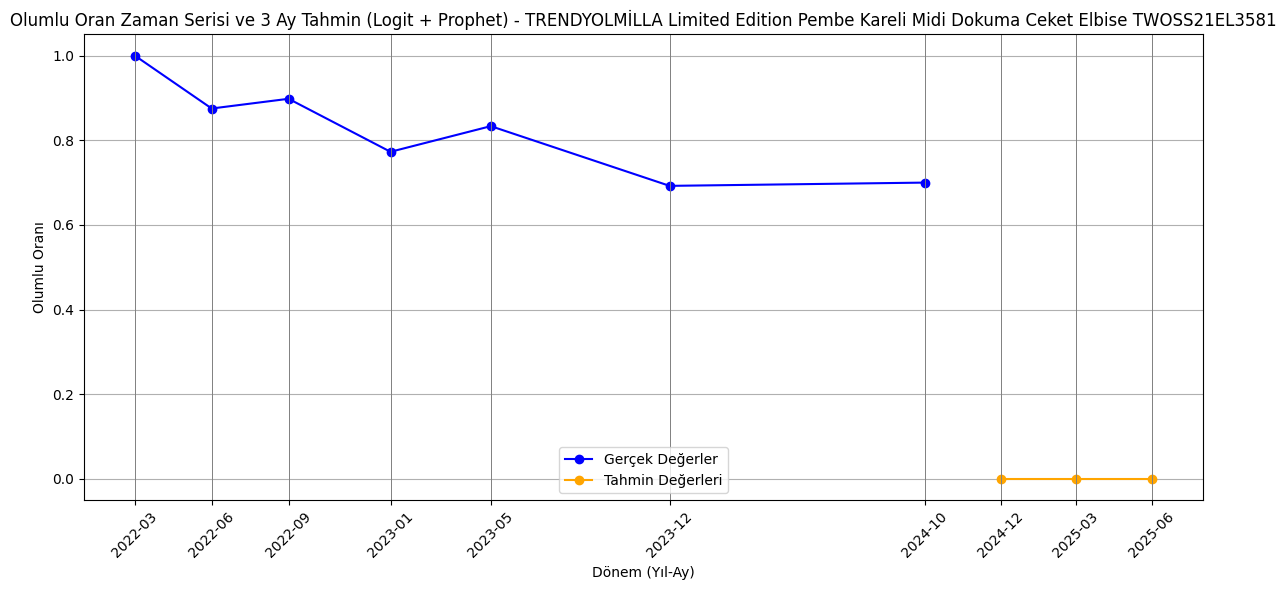

22:55:36 - cmdstanpy - INFO - Chain [1] start processing
22:55:36 - cmdstanpy - INFO - Chain [1] done processing


Ürün: TRENDYOLMİLLA Mavi Dikiş Detaylı Fitted/Vücuda Oturan Mini Denim Elbise TWOSS24EL00284


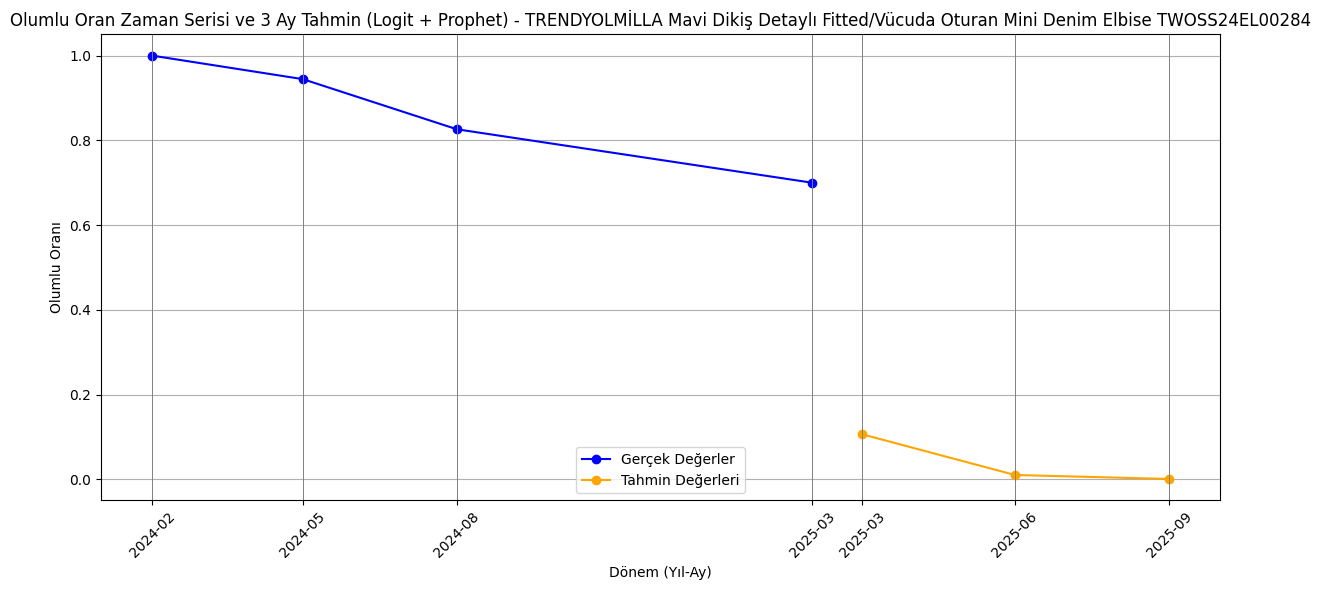

22:55:36 - cmdstanpy - INFO - Chain [1] start processing
22:55:36 - cmdstanpy - INFO - Chain [1] done processing


Ürün: TRENDYOLMİLLA X Sagaza Studio Siyah Belden Açılan/Skater Beli Lastikli Piliseli Poplin Elbise TCLAW24EL00000


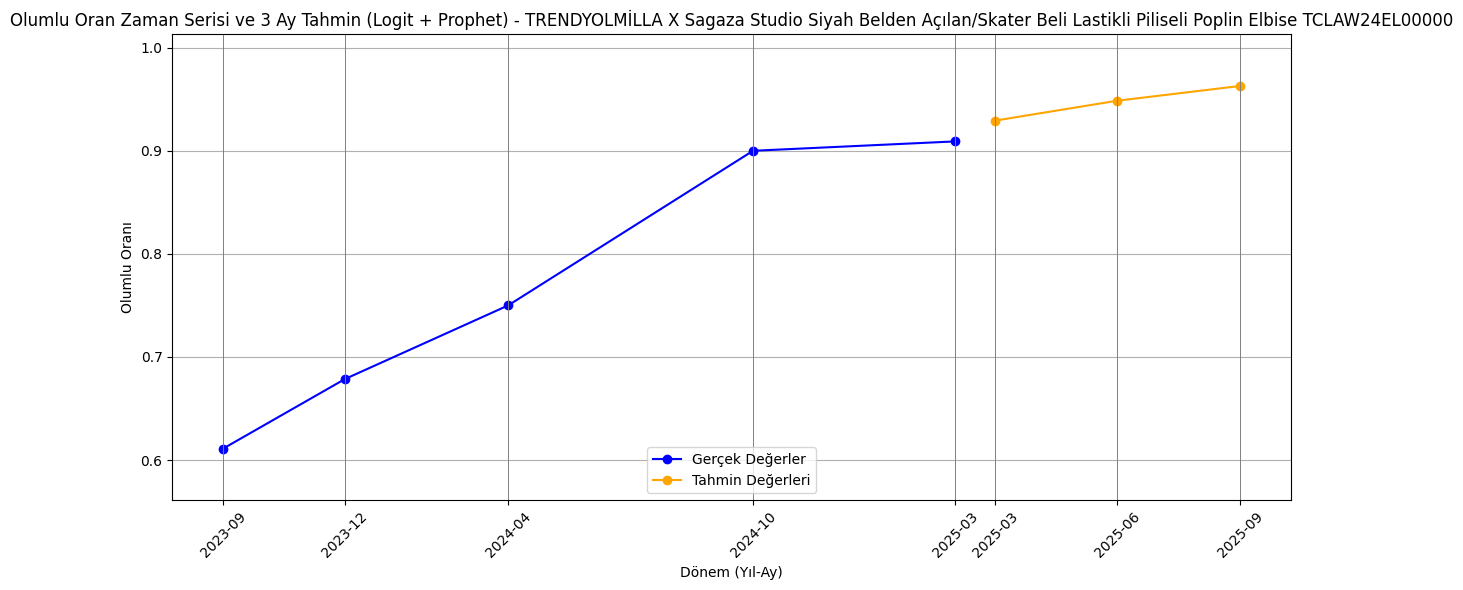

Ürün: TRENDYOLMİLLA Siyah Dokuma Püsküllü Cut Out/Pencere Maxi Plaj Elbisesi TBESS21EL3624


22:55:37 - cmdstanpy - INFO - Chain [1] start processing
22:55:37 - cmdstanpy - INFO - Chain [1] done processing


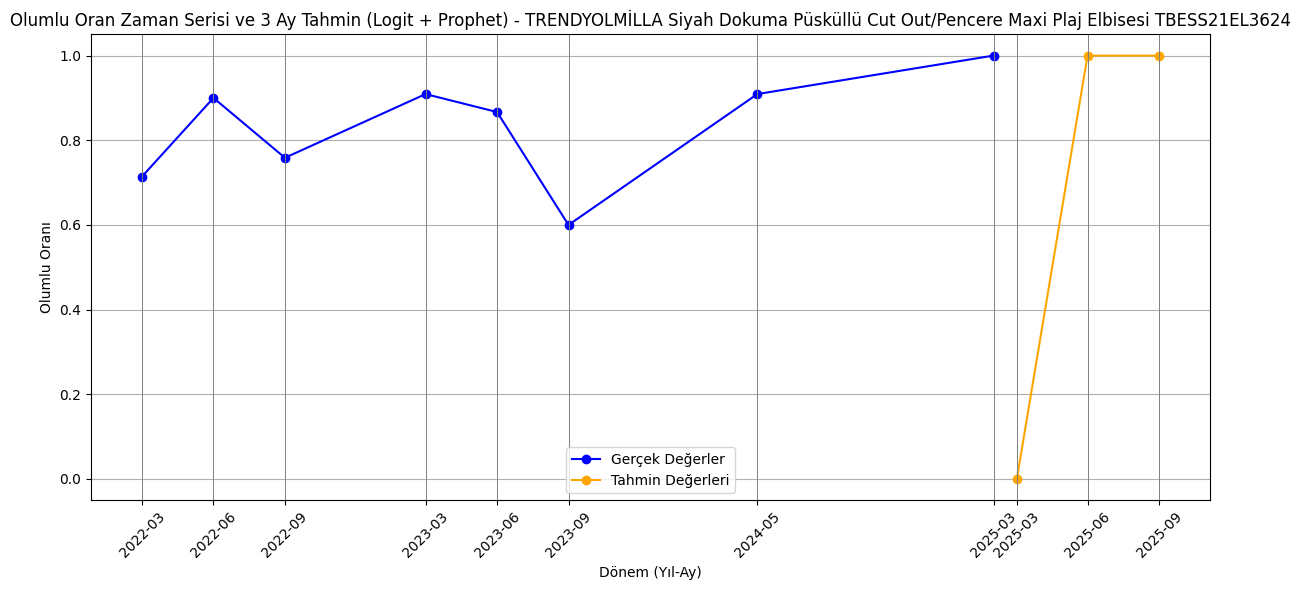

22:55:38 - cmdstanpy - INFO - Chain [1] start processing


Ürün: Trendyol Curve Siyah Ayarlanabilir Askılı Vücuda Oturan Midi/Orta Boy Dokuma Büyük Beden Elbise TBBSS22AH00039


22:55:38 - cmdstanpy - INFO - Chain [1] done processing


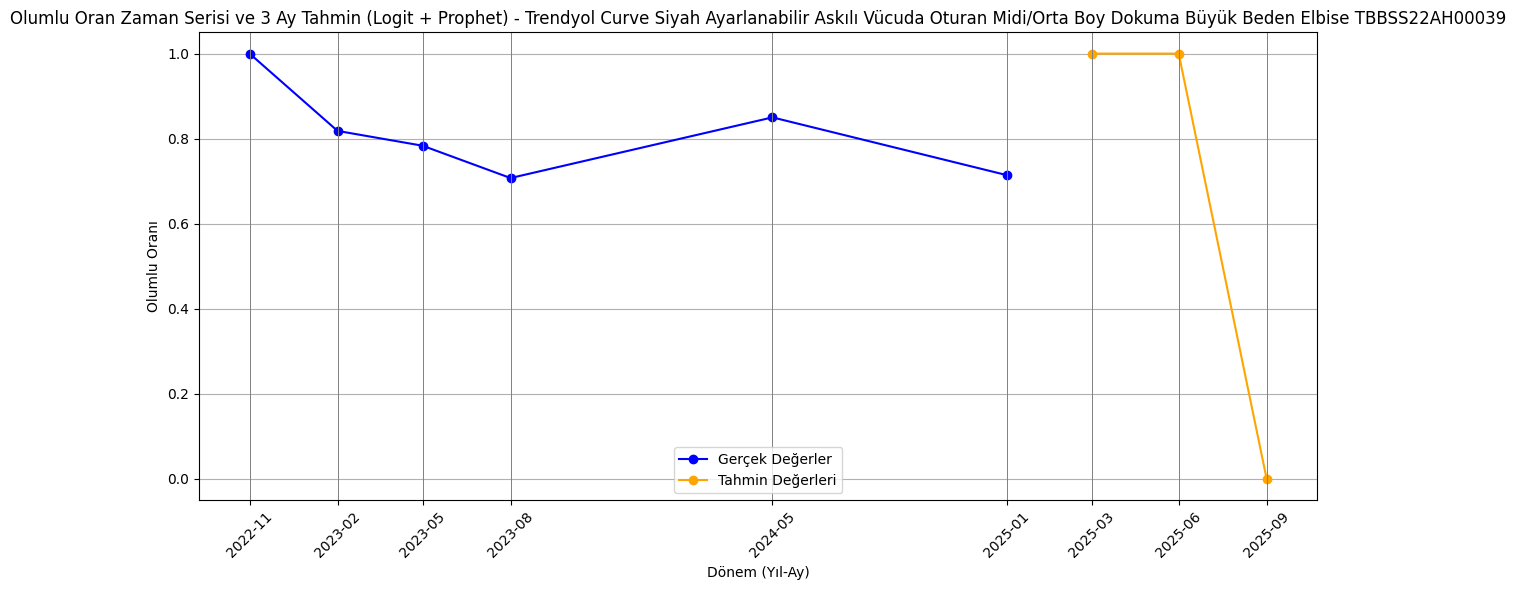

Ürün: TRENDYOLMİLLA Mint Düz Kesim Cepli Gömlek Yaka Keten Görünümlü Mini Dokuma Elbise TWOSS22EL1068


22:55:38 - cmdstanpy - INFO - Chain [1] start processing
22:55:39 - cmdstanpy - INFO - Chain [1] done processing


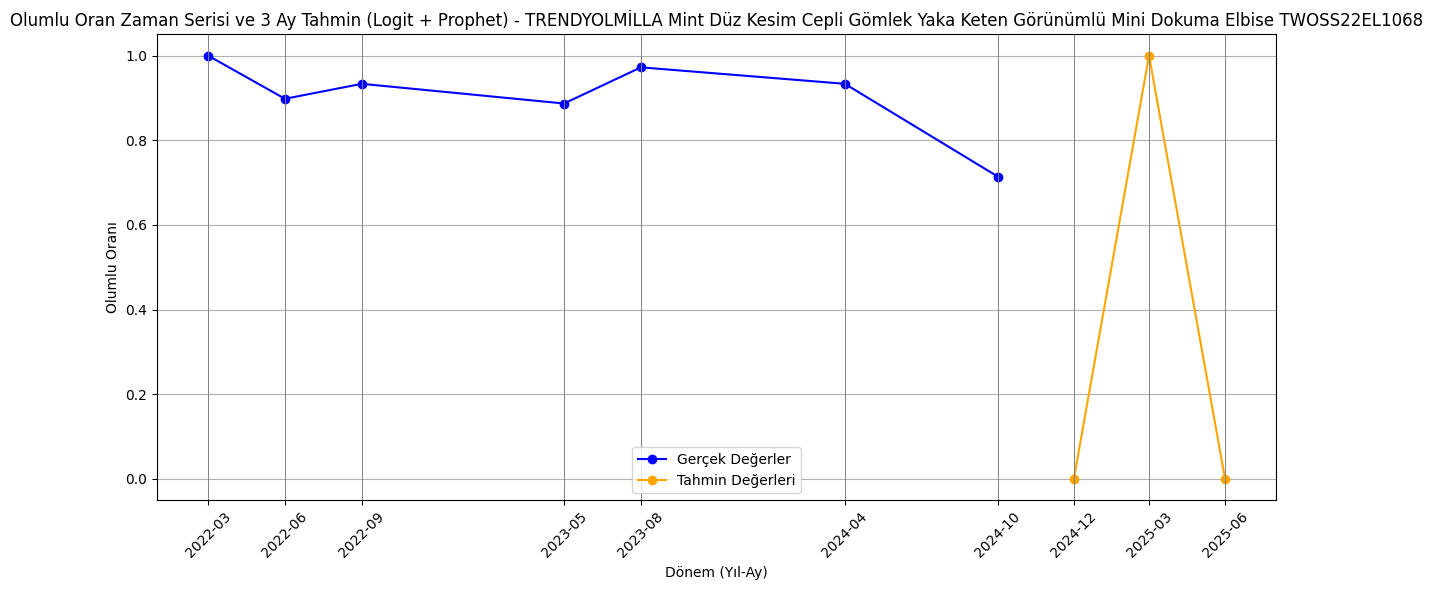

Ürün: TRENDYOLMİLLA Kırmızı Düğme Detaylı Mini Dokuma Ceket Elbise TWOAW24EL00462


22:55:39 - cmdstanpy - INFO - Chain [1] start processing
22:55:39 - cmdstanpy - INFO - Chain [1] done processing


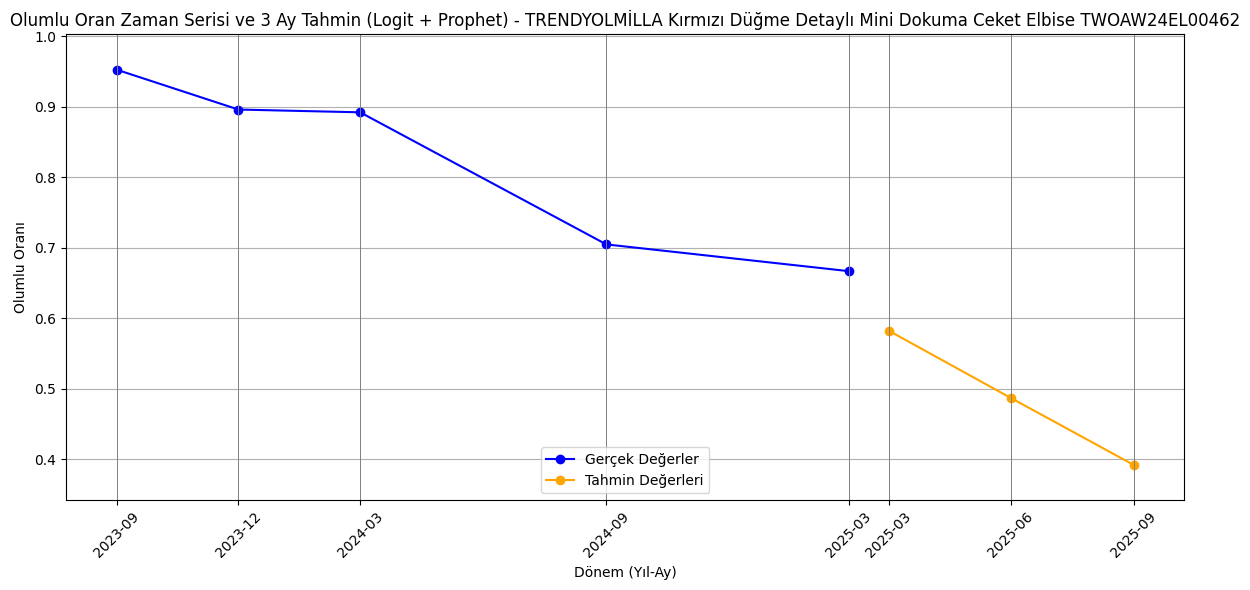

In [6]:
df = df_trend_diff.head(25)
urunler = df["Ürün Adı"]

for urun in urunler:
    print(f"Ürün: {urun}")
    prophet_logit_tahmin_3ay(df_product_periodic, urun)

Mevsimlik Eğilim

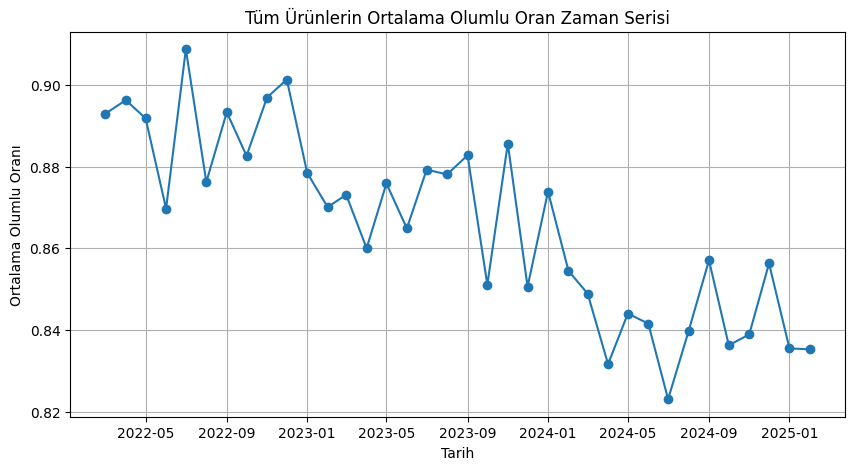

In [7]:
df_product_periodic['Tarih'] = pd.to_datetime(df_product_periodic['Yıl_Ay_Min'], format='%Y-%m')

df_grouped = df_product_periodic.groupby('Tarih')['Olumlu Oranı'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_grouped['Tarih'], df_grouped['Olumlu Oranı'], marker='o')
plt.title('Tüm Ürünlerin Ortalama Olumlu Oran Zaman Serisi')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Olumlu Oranı')
plt.grid(True)
plt.show()


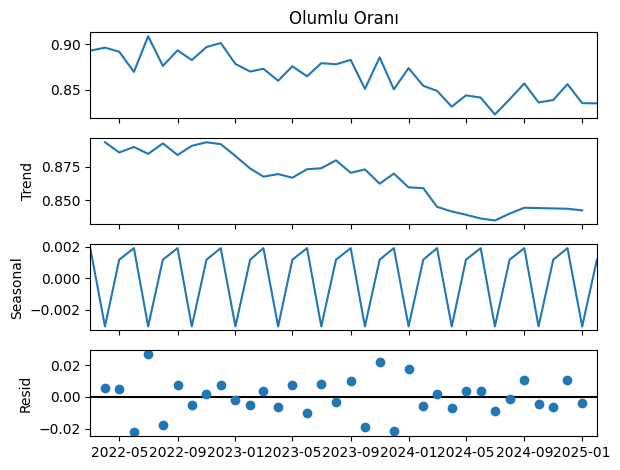

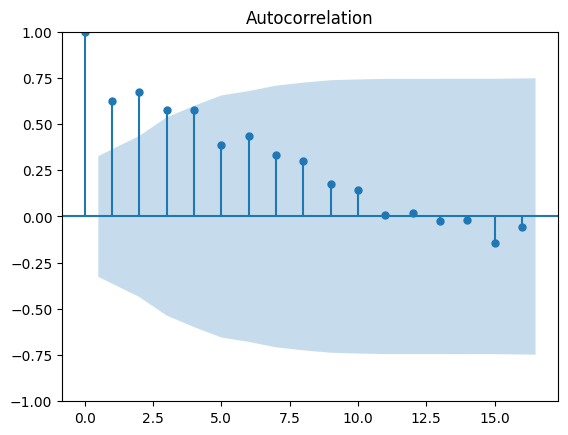

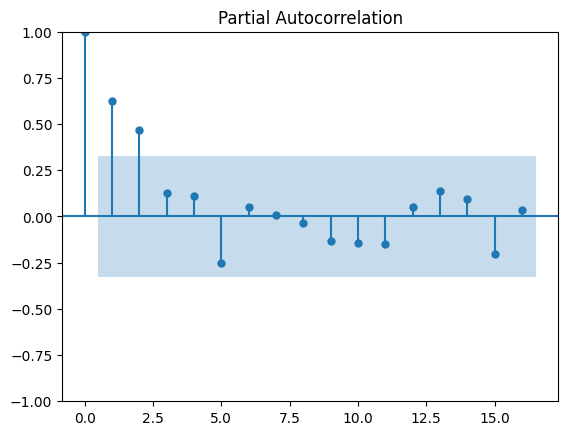

In [ ]:
result = seasonal_decompose(df_grouped.set_index('Tarih')['Olumlu Oranı'], model='additive', period=3)
result.plot()
plt.show()

plot_acf(df_grouped['Olumlu Oranı'])
plt.show()

plot_pacf(df_grouped['Olumlu Oranı'])
plt.show()


In [ ]:
def sarima_tahmin_3ay(df_product_periodic, urun_adi, seasonal_period=3):
    df_urun = df_product_periodic[df_product_periodic["Ürün Adı"] == urun_adi].reset_index(drop=True)
    df_urun['Tarih'] = pd.to_datetime(df_urun['Yıl_Ay_Min'], format='%Y-%m')
    ts = df_urun.set_index('Tarih')['Olumlu Oranı']
    
    if len(ts) < (2 * seasonal_period): 
        seasonal_order = (0,0,0,0)
        print(f"UYARI: {urun_adi} için seasonal kapatıldı (dönem sayısı yetersiz: {len(ts)})")
    else:
        seasonal_order = (1,1,1,seasonal_period)

    model = SARIMAX(ts, order=(1,0,1), seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    forecast = model_fit.get_forecast(steps=3)
    forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=3, freq='MS')

    pred = forecast.predicted_mean
    pred = np.clip(pred, 0, 1)
    conf_int = forecast.conf_int().clip(lower=0, upper=1)

    all_dates = list(ts.index) + list(forecast_index)
    all_labels = [d.strftime('%Y-%m') for d in all_dates]
    all_values = list(ts.values) + list(pred)

    plt.figure(figsize=(12,6))
    plt.plot(ts.index, ts.values, marker='o', color='blue', label='Gerçek Değerler')
    plt.plot(forecast_index, pred, marker='o', color='orange', label='Tahmin Değerleri')
    plt.fill_between(forecast_index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='orange', alpha=0.3)

    for d in all_dates:
        plt.axvline(x=d, color='gray', linestyle='-', linewidth=0.7)

    plt.xticks(all_dates, all_labels, rotation=45)
    plt.ylim(-0.05, 1.05)
    plt.title(f"Olumlu Oran Zaman Serisi ve 3 Dönem SARIMA Tahmini - {urun_adi}")
    plt.xlabel("Dönem (Yıl-Ay)")
    plt.ylabel("Olumlu Oranı")
    plt.legend()
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


In [10]:
donem_sayilari = df_product_periodic.groupby("Ürün Adı").size()
urunler_4_ustu = donem_sayilari[donem_sayilari >= 4].index.tolist()

df_filtered_sorted = df_trend_diff[df_trend_diff['Ürün Adı'].isin(urunler_4_ustu)] \
    .sort_values(by='Mutlak_Değişim', ascending=False)

df= df_filtered_sorted.head(25)
urunler = df["Ürün Adı"]

Ürün: TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243


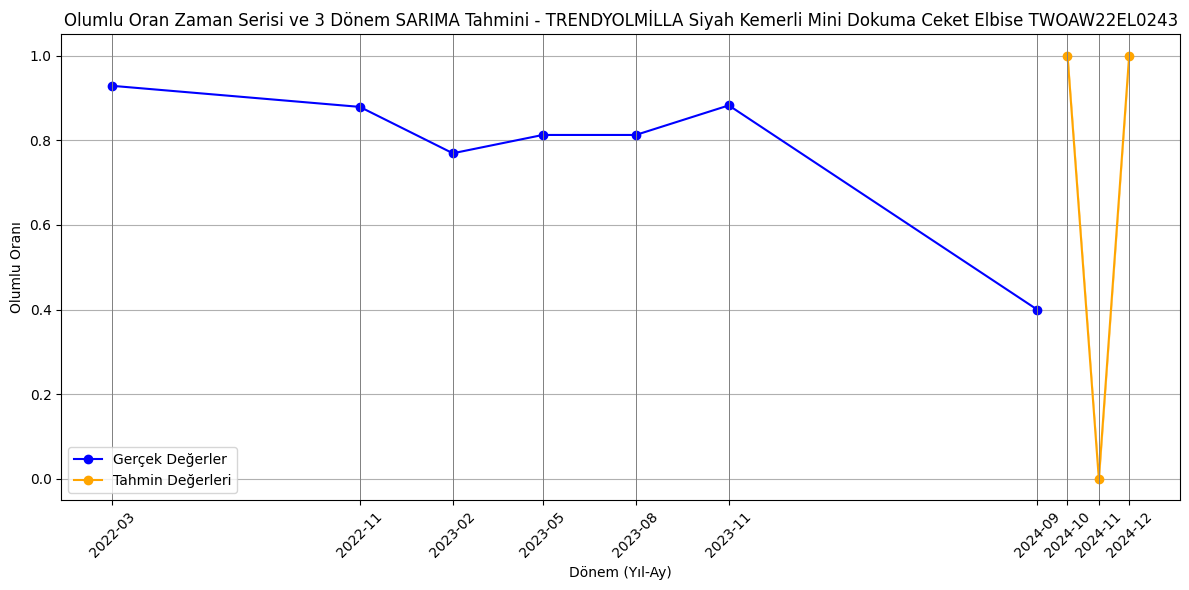

Ürün: Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563
UYARI: Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563 için seasonal kapatıldı (dönem sayısı yetersiz: 5)


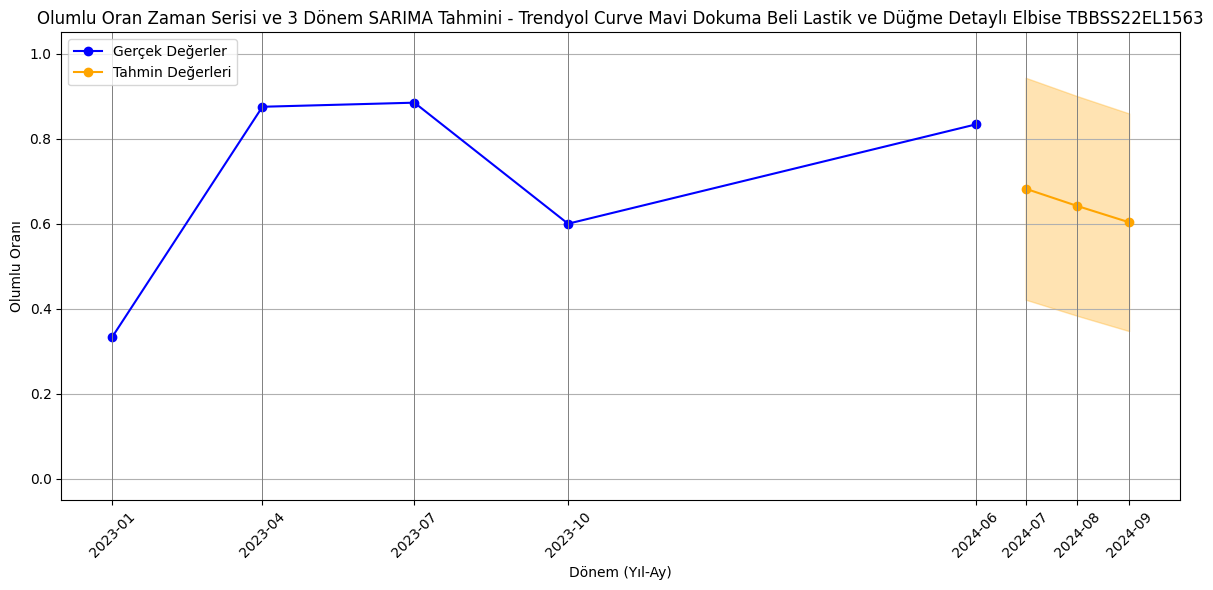

Ürün: TRENDYOLMİLLA Beyaz Skater/Belden Açılan Brode Mini Astarlı Dokuma Elbise TWOSS21EL3680


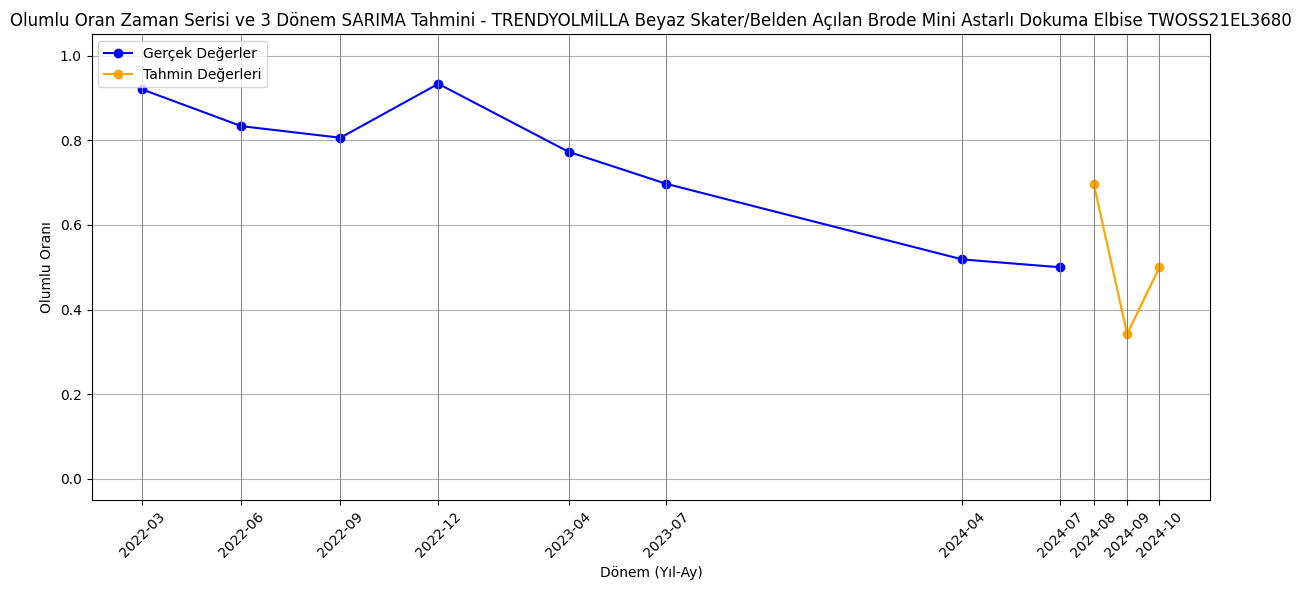

Ürün: TRENDYOLMİLLA Beyaz A Kesim Yaka Detaylı Brode Mini Astarlı Dokuma Elbise TWOSS21EL2089


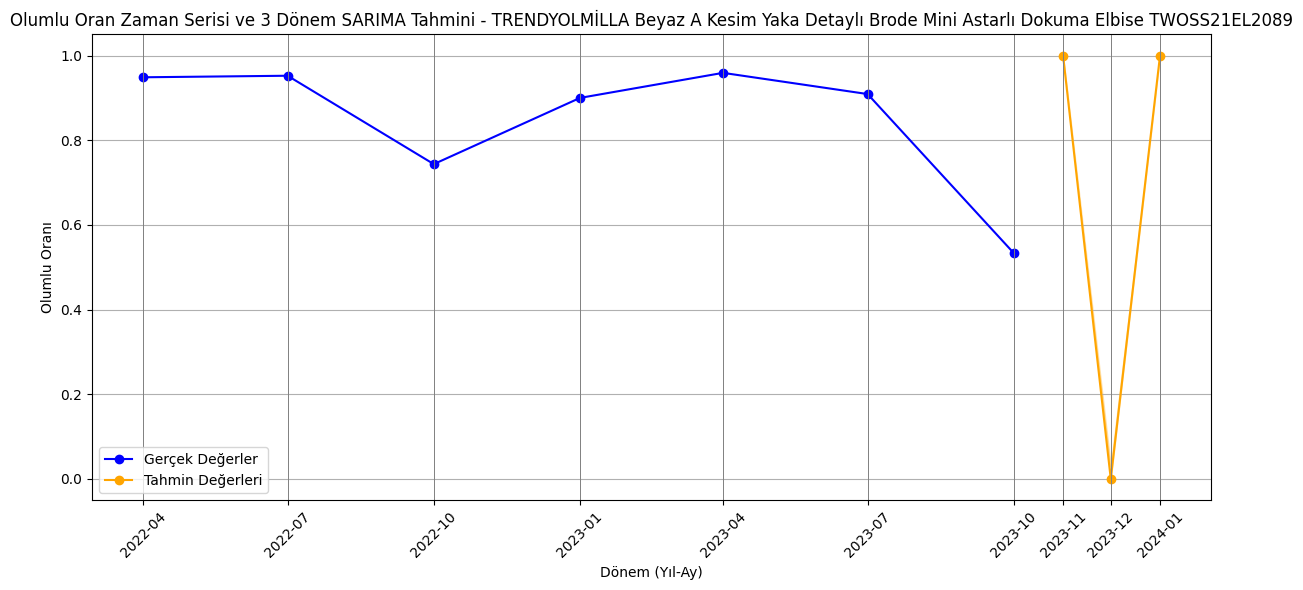

Ürün: TRENDYOLMİLLA Siyah Mini Triko Pileli Etek Detaylı Elbise TWOAW24EL00013
UYARI: TRENDYOLMİLLA Siyah Mini Triko Pileli Etek Detaylı Elbise TWOAW24EL00013 için seasonal kapatıldı (dönem sayısı yetersiz: 5)


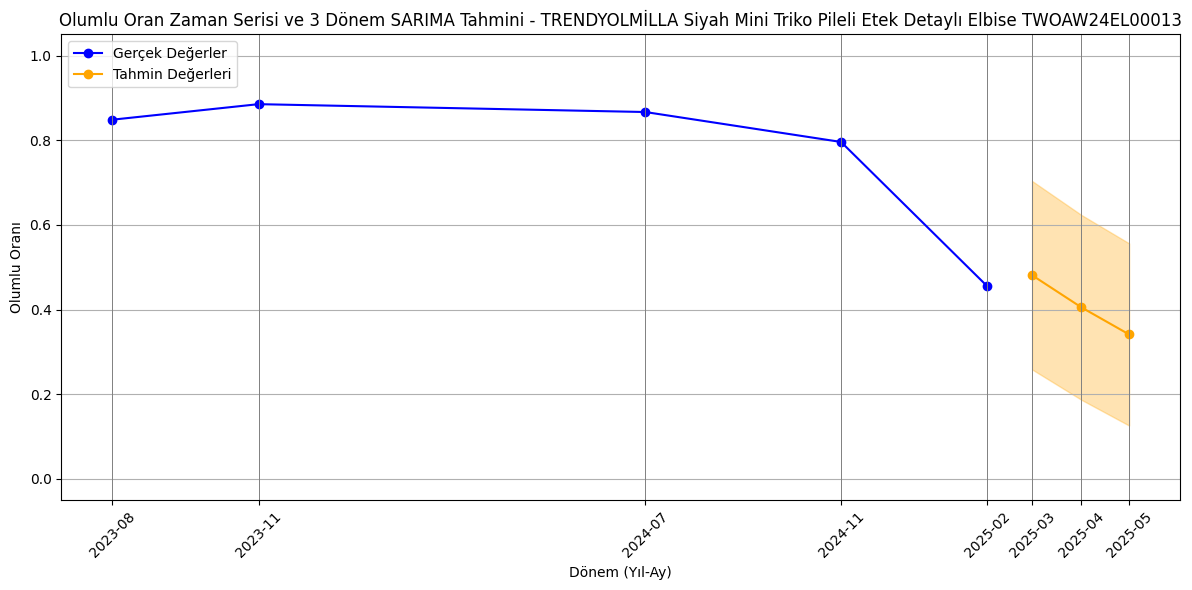

Ürün: TRENDYOLMİLLA Siyah Eteği Volanlı A Kesim Şifon Midi Astarlı Dokuma Elbise TWOSS22EL00733


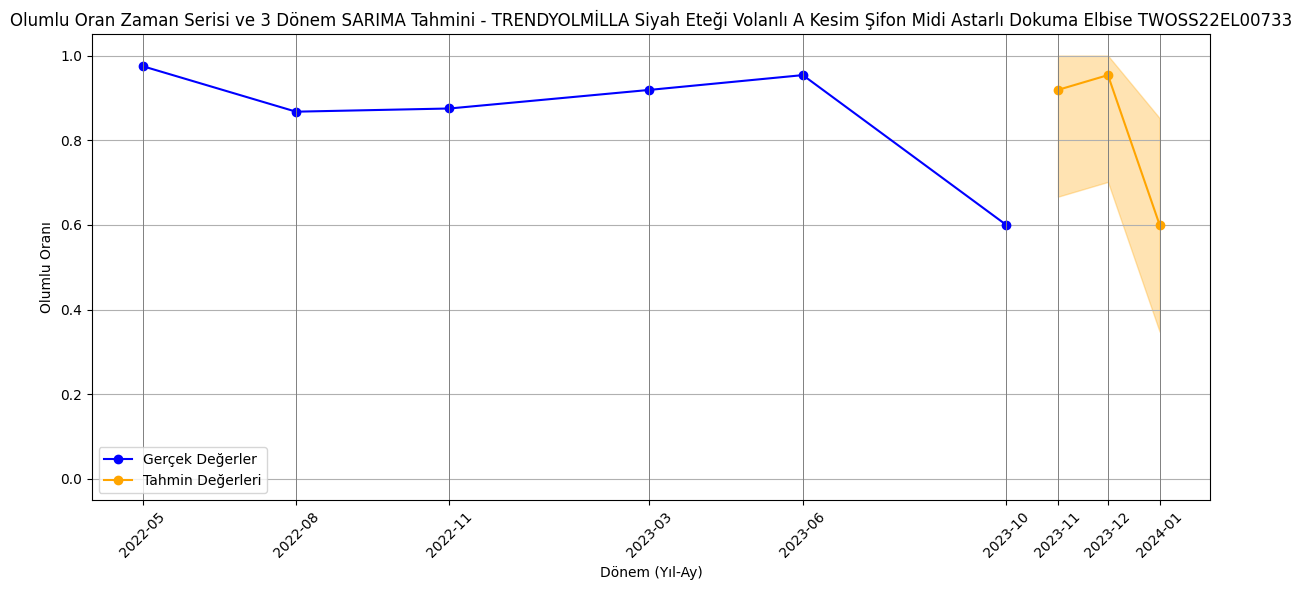

Ürün: TRENDYOLMİLLA Haki Gömlek Yaka Dokuma Elbise TWOAW21EL1964


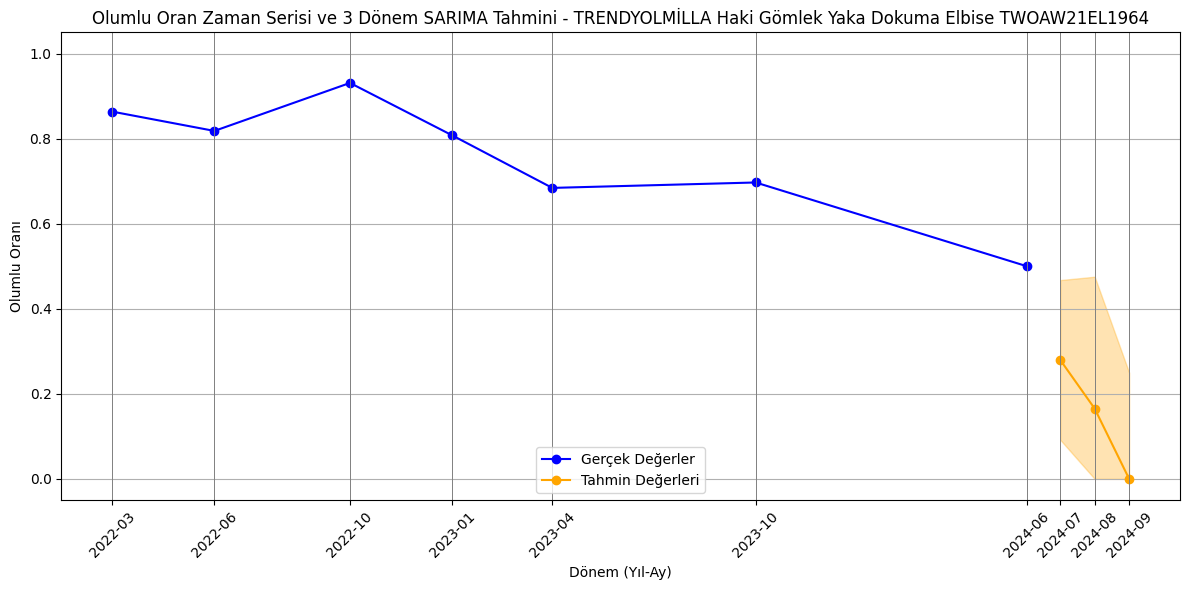

Ürün: TRENDYOLMİLLA Beyaz Dokuma %100 Pamuk Mini Plaj Elbisesi TBESS21EL3979


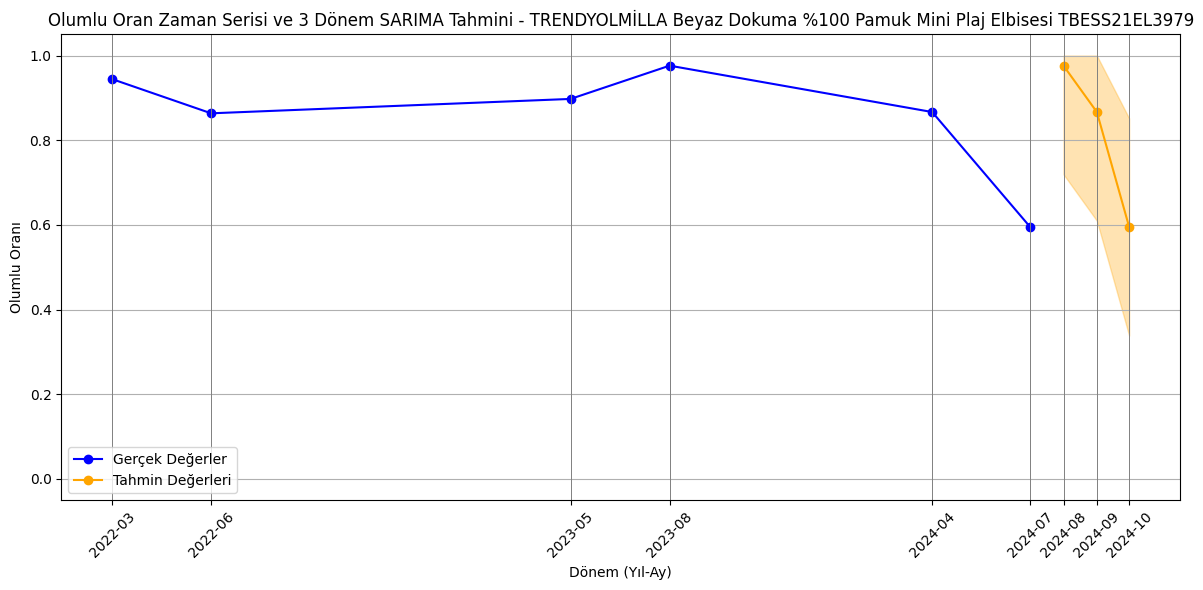

Ürün: TRENDYOLMİLLA Taş Kuşaklı A Kesim Mini Kruvaze Yaka Dokuma Keten Görünümlü Elbise TWOSS19XN0008


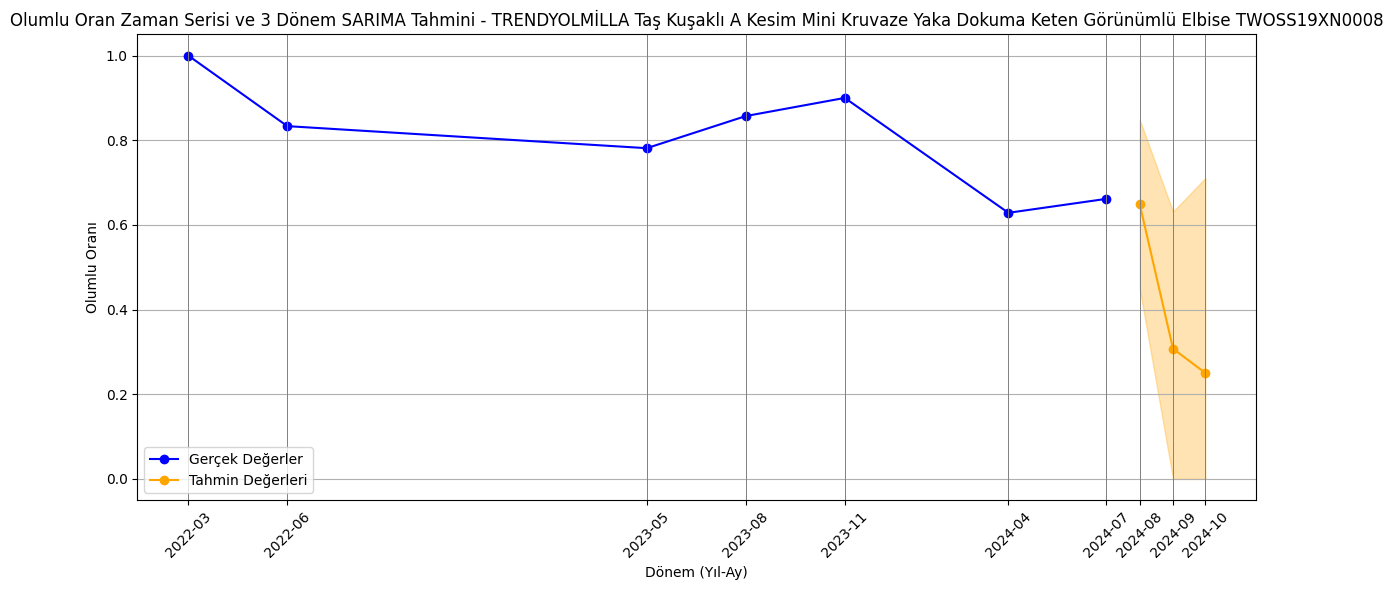

Ürün: TRENDYOLMİLLA Lacivert Kuşaklı Yırtmaçlı Çiçek Desenli Midi Dokuma Gömlek Elbise TWOSS20EL2822


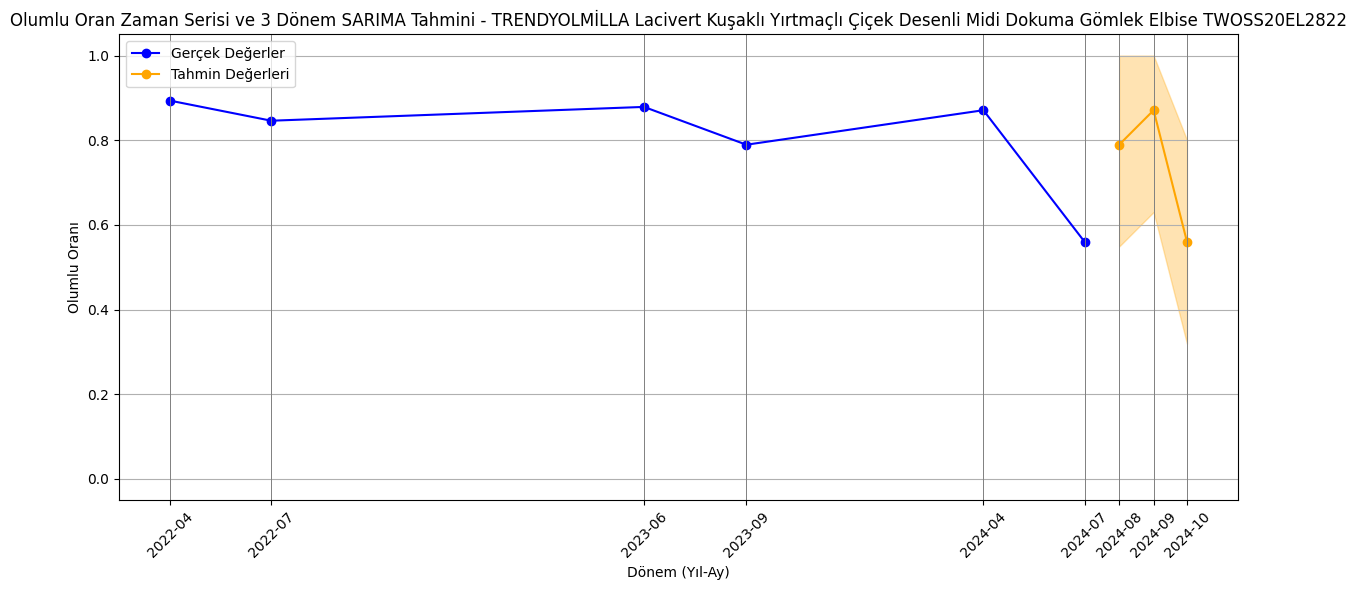

Ürün: TRENDYOLMİLLA Siyah Vücuda Oturan Gipeli Mini Dokuma Elbise TWOSS23EL00892
UYARI: TRENDYOLMİLLA Siyah Vücuda Oturan Gipeli Mini Dokuma Elbise TWOSS23EL00892 için seasonal kapatıldı (dönem sayısı yetersiz: 4)


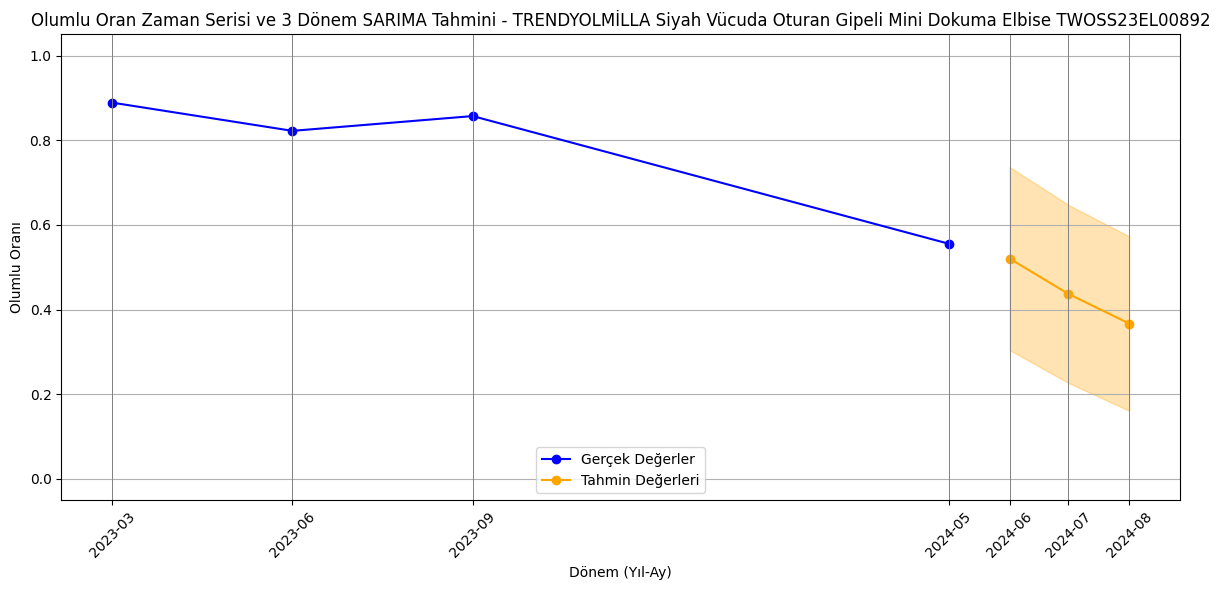

Ürün: TRENDYOLMİLLA Çok Renkli Çiçek Desenli Belden Açılan Mini Astarlı Şifon Dokuma Elbise TWOAW24EL00841
UYARI: TRENDYOLMİLLA Çok Renkli Çiçek Desenli Belden Açılan Mini Astarlı Şifon Dokuma Elbise TWOAW24EL00841 için seasonal kapatıldı (dönem sayısı yetersiz: 5)


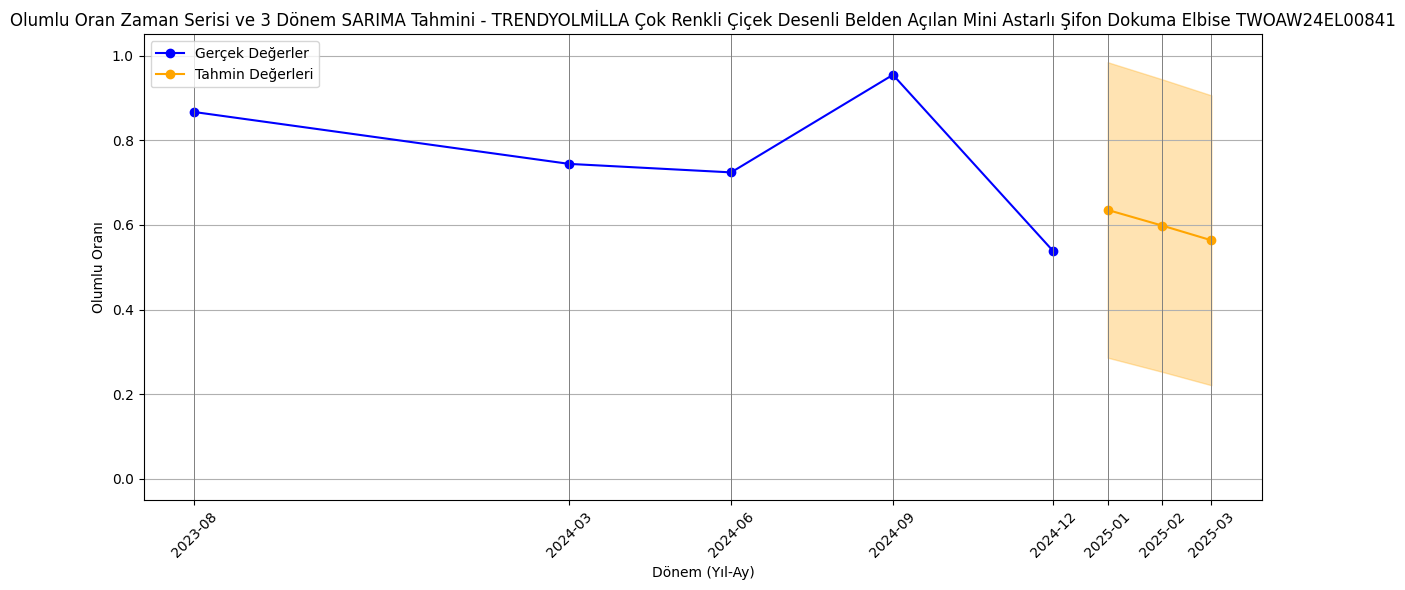

Ürün: TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488
UYARI: TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488 için seasonal kapatıldı (dönem sayısı yetersiz: 4)


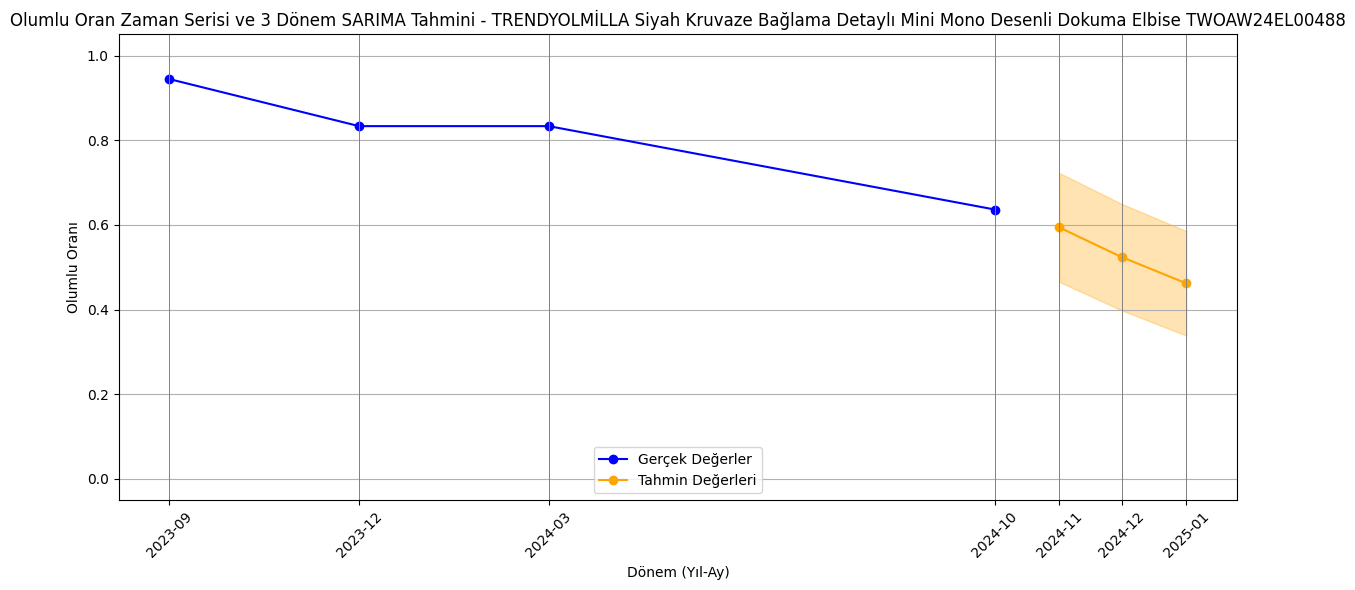

Ürün: TRENDYOLMİLLA Siyah Düğme Detaylı Kolsuz Dokuma Mini Ceket Elbise TWOSS19AP0280


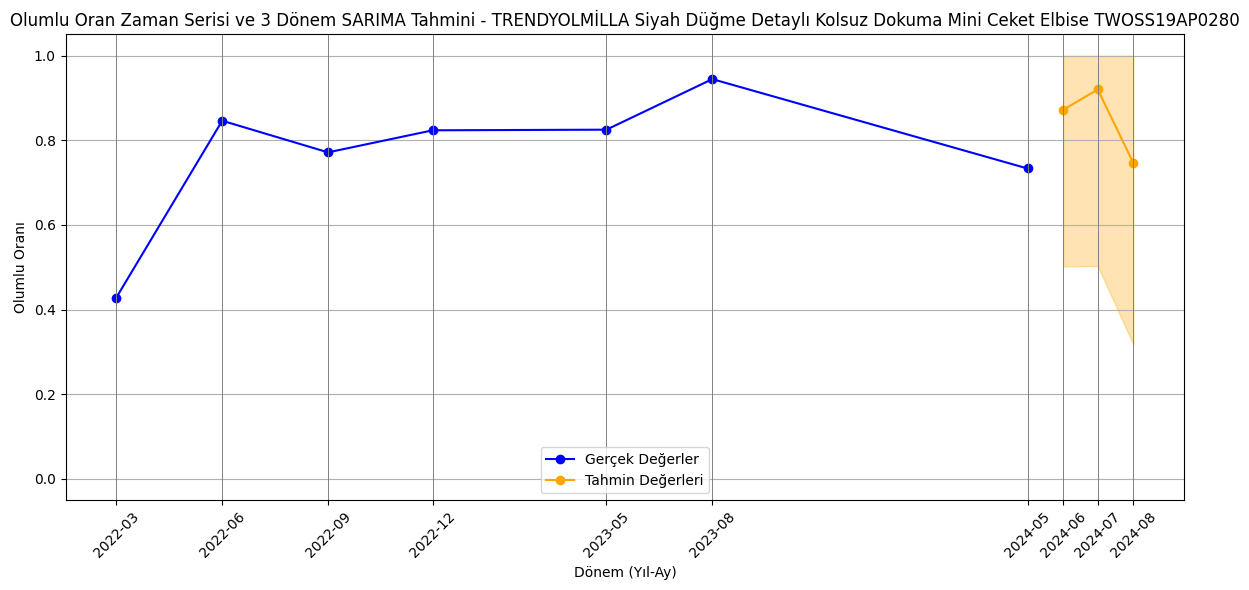

Ürün: TRENDYOLMİLLA Mavi Dikiş Detaylı Fitted/Vücuda Oturan Mini Denim Elbise TWOSS24EL00284
UYARI: TRENDYOLMİLLA Mavi Dikiş Detaylı Fitted/Vücuda Oturan Mini Denim Elbise TWOSS24EL00284 için seasonal kapatıldı (dönem sayısı yetersiz: 4)


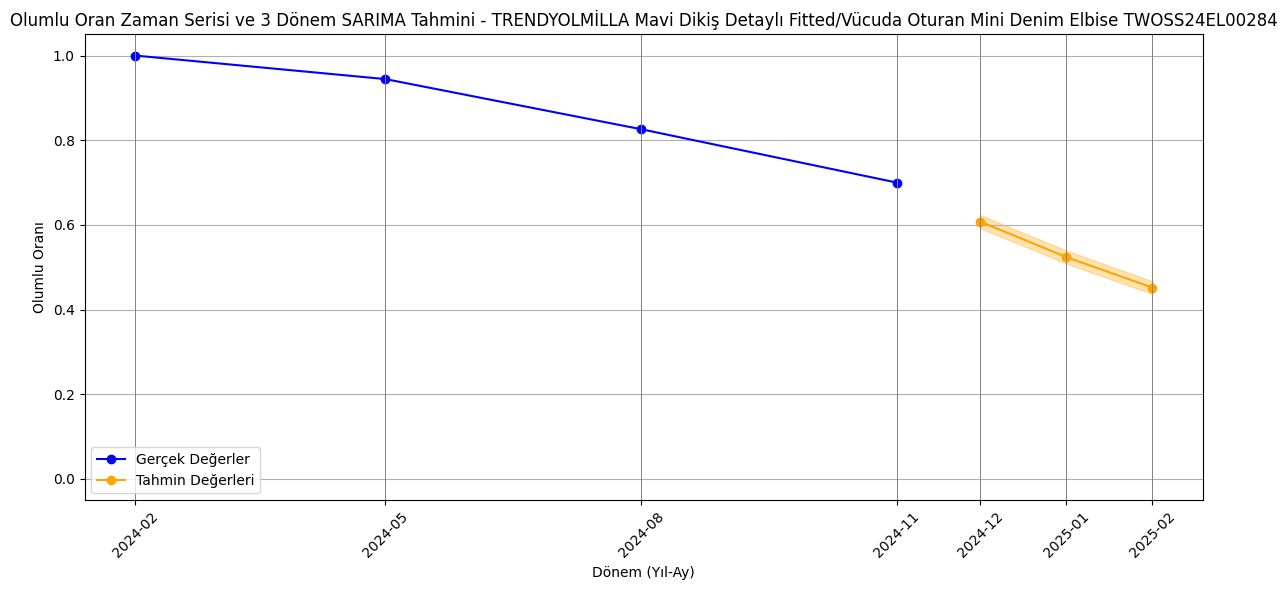

Ürün: TRENDYOLMİLLA Limited Edition Pembe Kareli Midi Dokuma Ceket Elbise TWOSS21EL3581


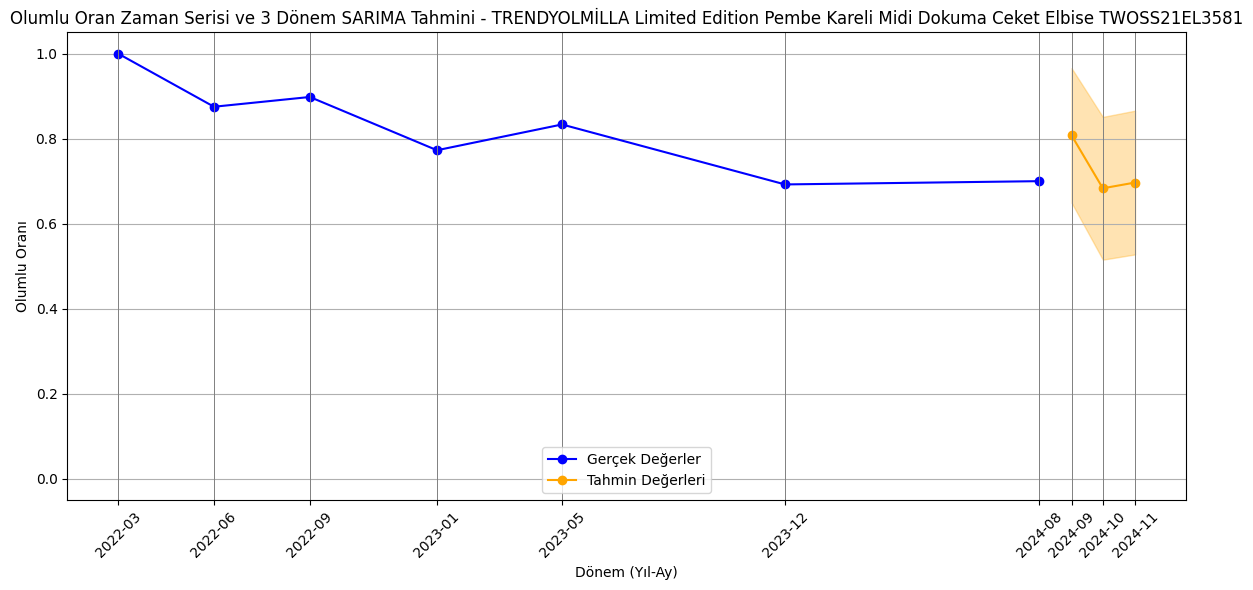

Ürün: TRENDYOLMİLLA X Sagaza Studio Siyah Belden Açılan/Skater Beli Lastikli Piliseli Poplin Elbise TCLAW24EL00000
UYARI: TRENDYOLMİLLA X Sagaza Studio Siyah Belden Açılan/Skater Beli Lastikli Piliseli Poplin Elbise TCLAW24EL00000 için seasonal kapatıldı (dönem sayısı yetersiz: 5)


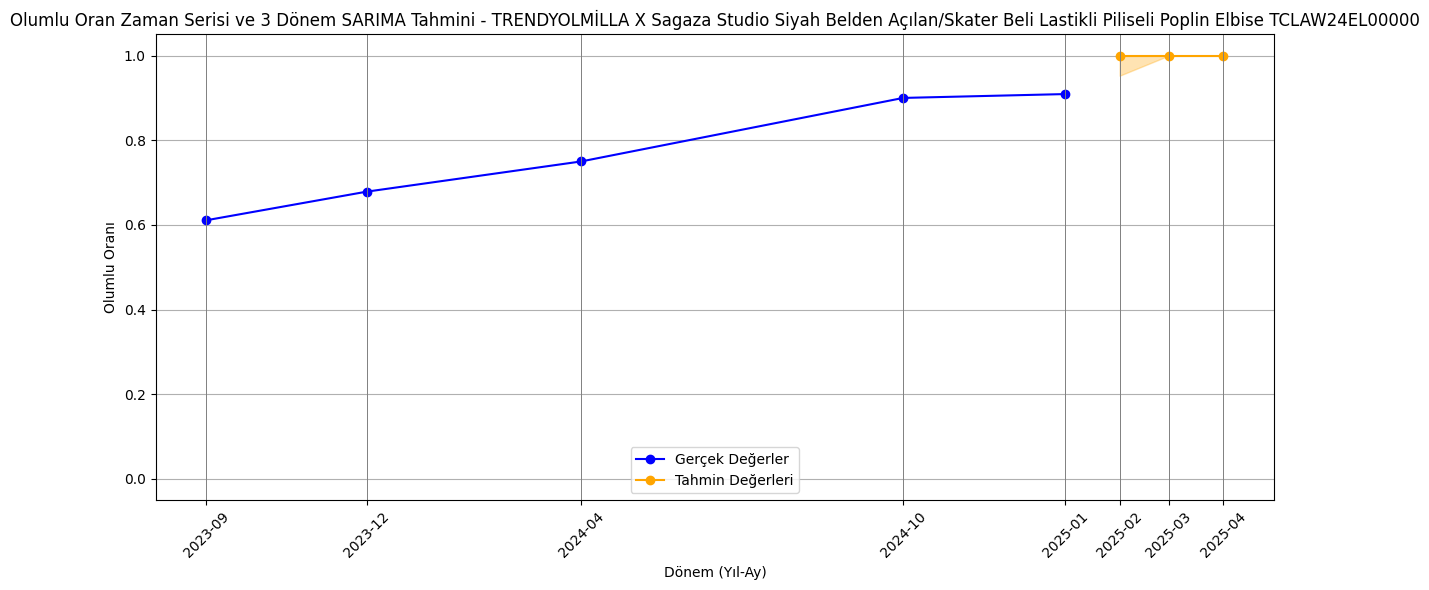

Ürün: TRENDYOLMİLLA Mint Düz Kesim Cepli Gömlek Yaka Keten Görünümlü Mini Dokuma Elbise TWOSS22EL1068


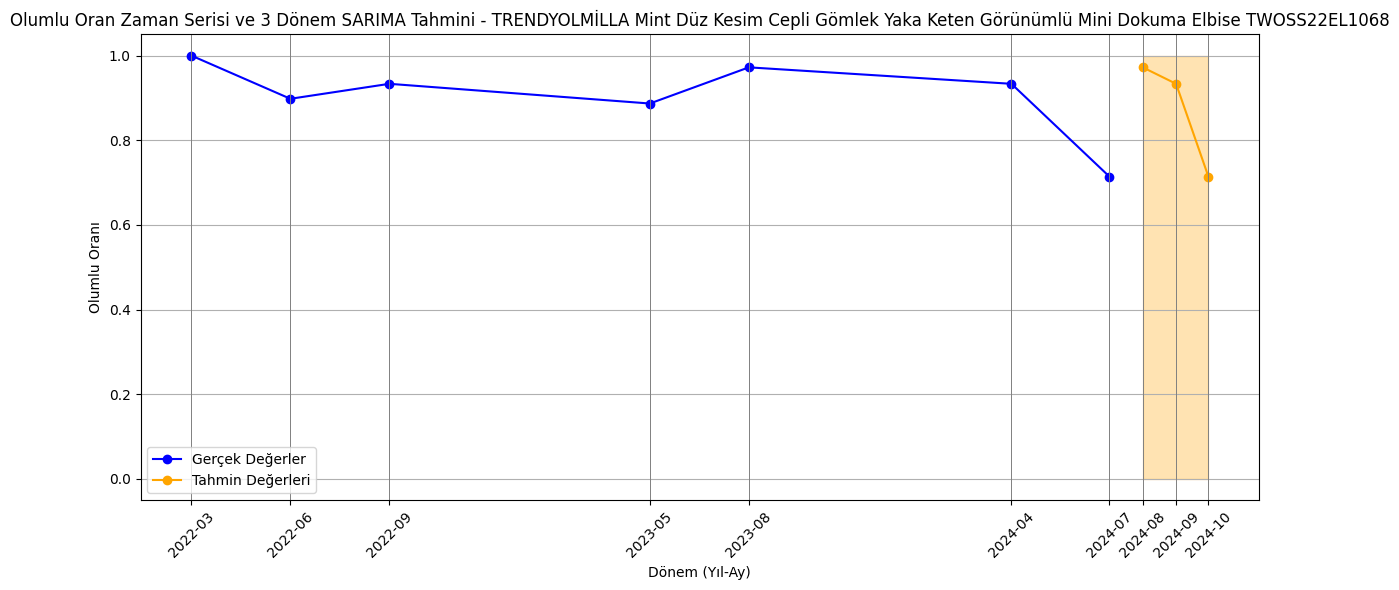

Ürün: Trendyol Curve Siyah Ayarlanabilir Askılı Vücuda Oturan Midi/Orta Boy Dokuma Büyük Beden Elbise TBBSS22AH00039


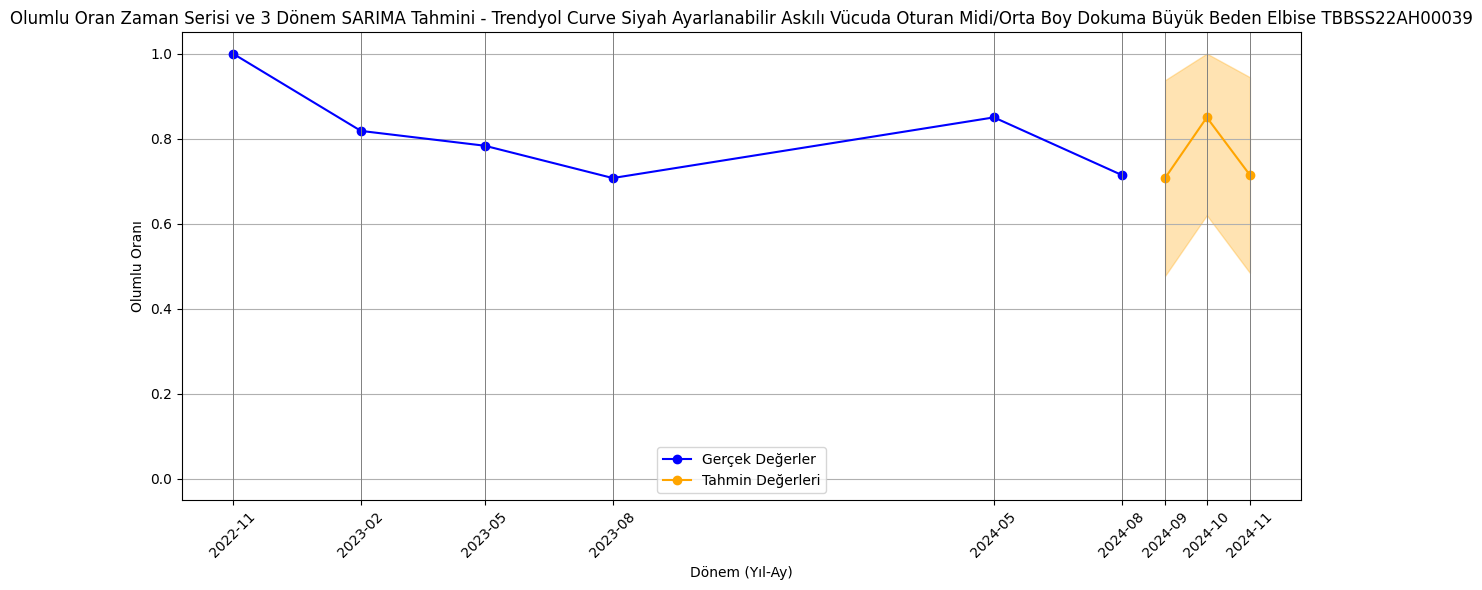

Ürün: TRENDYOLMİLLA Kırmızı Düğme Detaylı Mini Dokuma Ceket Elbise TWOAW24EL00462
UYARI: TRENDYOLMİLLA Kırmızı Düğme Detaylı Mini Dokuma Ceket Elbise TWOAW24EL00462 için seasonal kapatıldı (dönem sayısı yetersiz: 5)


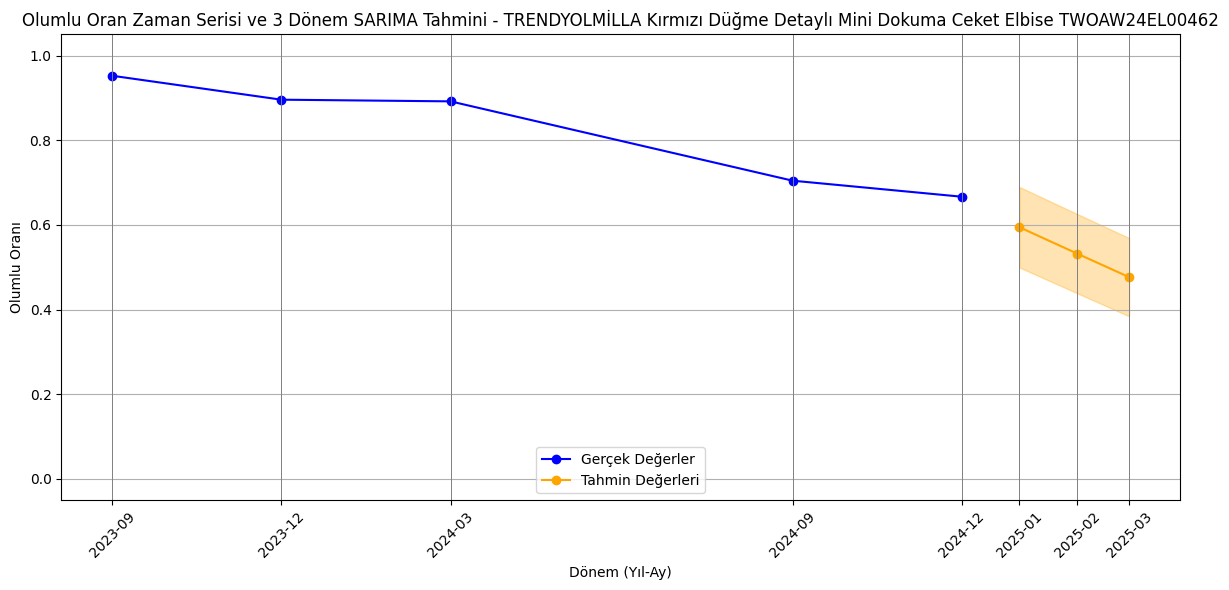

Ürün: TRENDYOLMİLLA Siyah Dokuma Püsküllü Cut Out/Pencere Maxi Plaj Elbisesi TBESS21EL3624


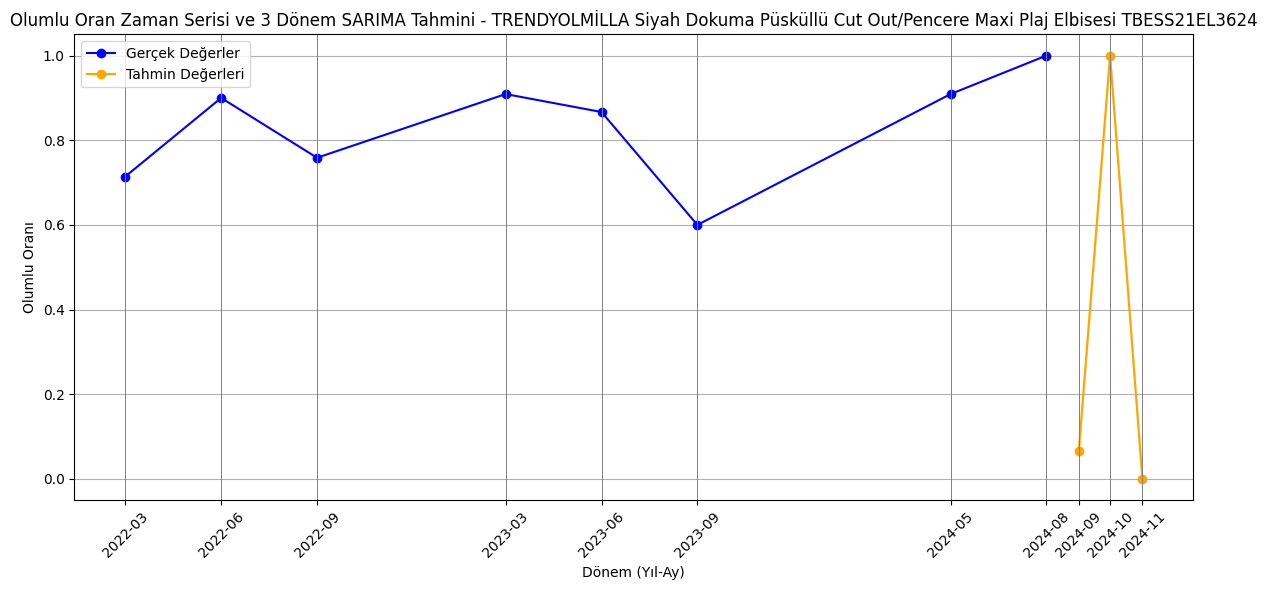

Ürün: TRENDYOLMİLLA Çiçek Desenli Mini Dokuma Cut Out/Pencere Plaj Elbisesi TBESS21EL1054


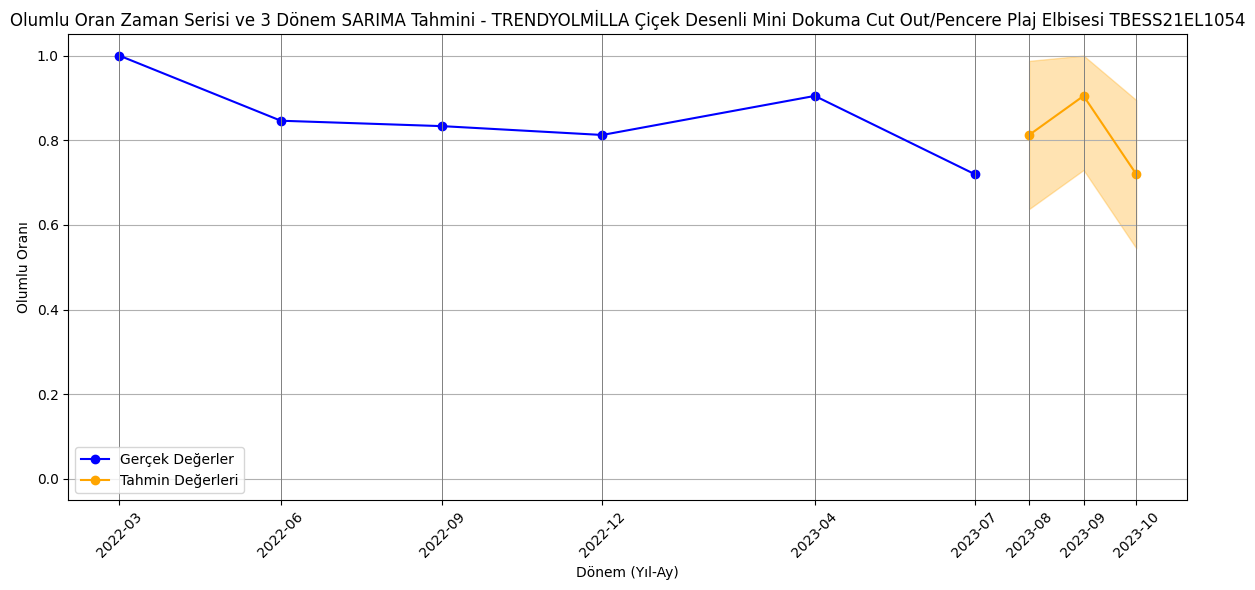

Ürün: TRENDYOLMİLLA Lacivert Maxi Triko Polo Yaka Elbise TWOSS24EL00282
UYARI: TRENDYOLMİLLA Lacivert Maxi Triko Polo Yaka Elbise TWOSS24EL00282 için seasonal kapatıldı (dönem sayısı yetersiz: 4)


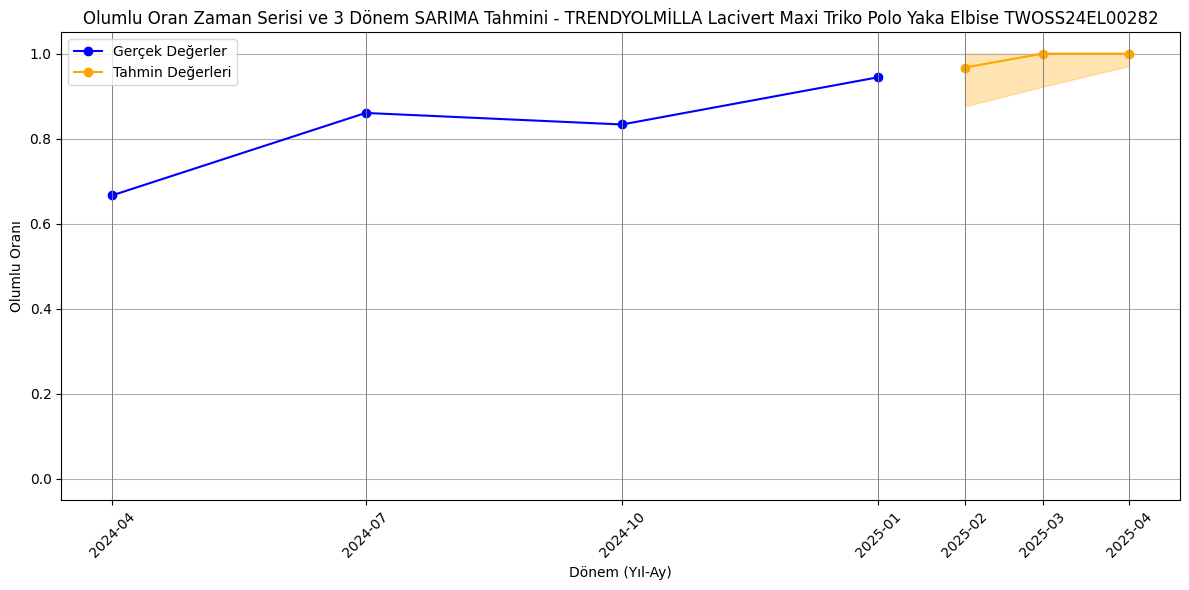

Ürün: TRENDYOLMİLLA Siyah Vücudu Saran Gömlek Yaka Mini Dokuma Elbise TWOAW23EL00611


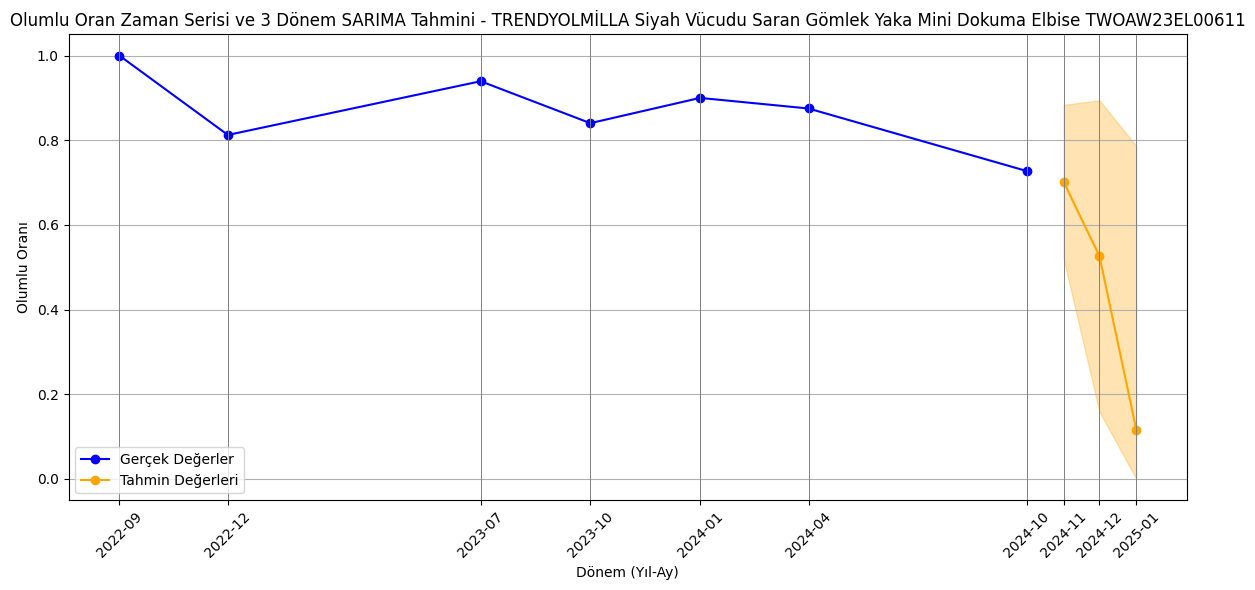

Ürün: TRENDYOLMİLLA Bridal Beyaz A-Kesim Straplez Dokuma Düğün/Nikah Abiye Elbise TPRSS24EL00139
UYARI: TRENDYOLMİLLA Bridal Beyaz A-Kesim Straplez Dokuma Düğün/Nikah Abiye Elbise TPRSS24EL00139 için seasonal kapatıldı (dönem sayısı yetersiz: 4)


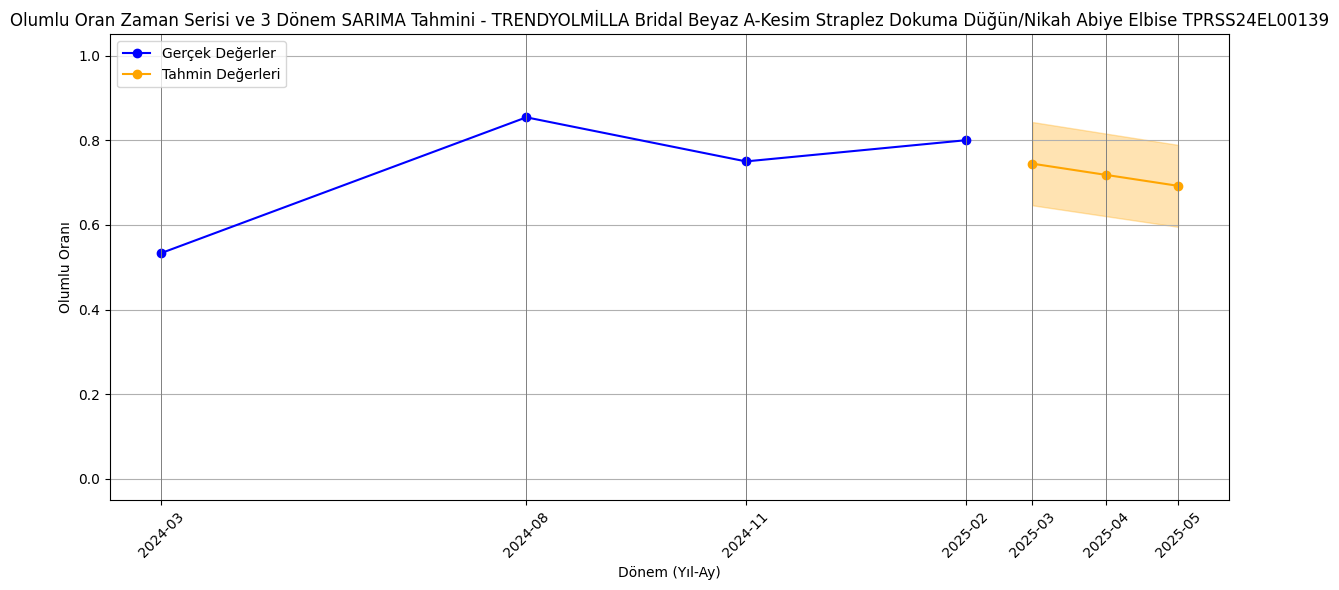

In [17]:
for urun in urunler:
    print(f"Ürün: {urun}")
    sarima_tahmin_3ay(df_product_periodic, urun)

Exponential Smoothing

In [ ]:
def exponential_smoothing_tahmin_3ay(df_product_periodic, urun_adi, seasonal_period=3, min_gerekli_donem=4):
    df_urun = df_product_periodic[df_product_periodic["Ürün Adı"] == urun_adi].reset_index(drop=True)
    df_urun['Tarih'] = pd.to_datetime(df_urun['Yıl_Ay_Min'], format='%Y-%m')
    ts = df_urun.set_index('Tarih')['Olumlu Oranı']

    freq = pd.infer_freq(ts.index) or 'MS'  

    if len(ts) < min_gerekli_donem:
        print(f"{urun_adi} için veri yetersiz ({len(ts)} dönem). Simple Exponential Smoothing uygulanacak.")
        model = ExponentialSmoothing(ts, initialization_method="estimated")
        fit = model.fit()
    elif len(ts) < 2 * seasonal_period:
        print(f"{urun_adi} için dönem sayısı sezonluk model için yetersiz ({len(ts)} dönem). Trend + Level uygulanacak.")
        model = ExponentialSmoothing(ts, trend='add', initialization_method="estimated")
        fit = model.fit()
    else:
        print(f"{urun_adi} için Holt-Winters (Additive Seasonal) uygulanıyor.")
        model = ExponentialSmoothing(ts, trend='add', seasonal='add',
                                     seasonal_periods=seasonal_period,
                                     initialization_method="estimated")
        fit = model.fit()

    forecast = fit.forecast(3)
    forecast = np.clip(forecast, 0, 1)

    forecast_index = pd.date_range(start=ts.index[-1] + pd.tseries.frequencies.to_offset(freq), periods=3, freq=freq)

    all_dates = list(ts.index) + list(forecast_index)
    all_labels = [d.strftime('%Y-%m') for d in all_dates]

    plt.figure(figsize=(12,6))
    plt.plot(ts.index, ts.values, marker='o', color='blue', label='Gerçek Değerler')
    plt.plot(forecast_index, forecast, marker='o', color='orange', label='Tahmin')
    for d in all_dates:
        plt.axvline(x=d, color='gray', linestyle='-', linewidth=0.7)
    plt.xticks(all_dates, all_labels, rotation=45)
    plt.ylim(-0.05, 1.05)
    plt.title(f"Olumlu Oran ve 3 Dönem Tahmini - {urun_adi}")
    plt.xlabel("Dönem (Yıl-Ay)")
    plt.ylabel("Olumlu Oranı")
    plt.legend()
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


Ürün: TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243
TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243 için Holt-Winters (Additive Seasonal) uygulanıyor.


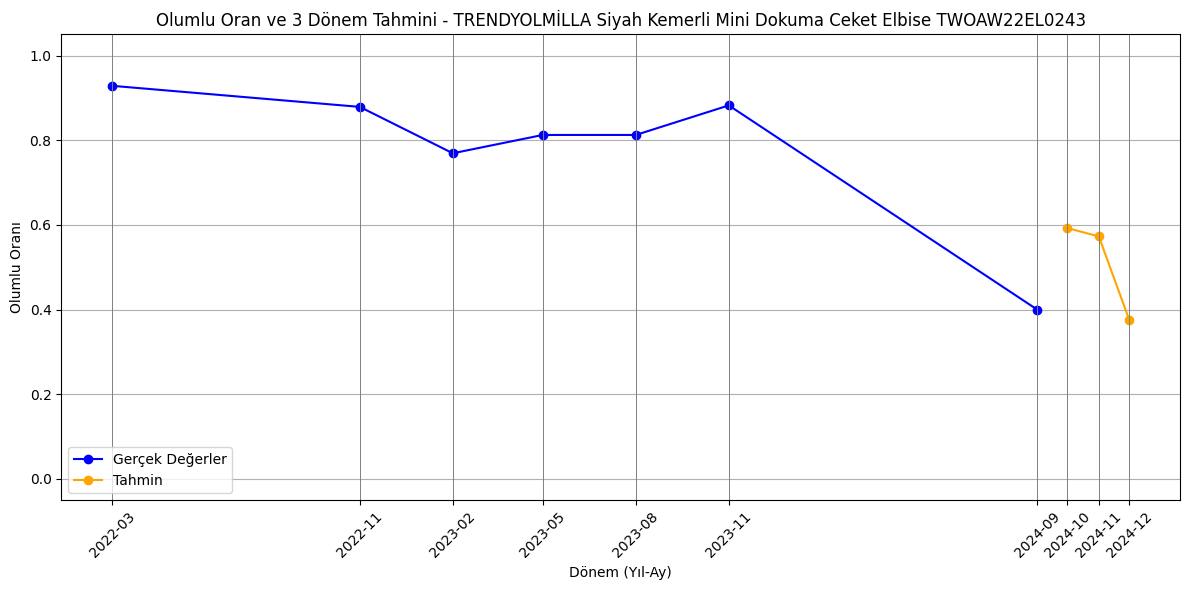

Ürün: Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563
Trendyol Curve Mavi Dokuma Beli Lastik ve Düğme Detaylı Elbise TBBSS22EL1563 için dönem sayısı sezonluk model için yetersiz (5 dönem). Trend + Level uygulanacak.


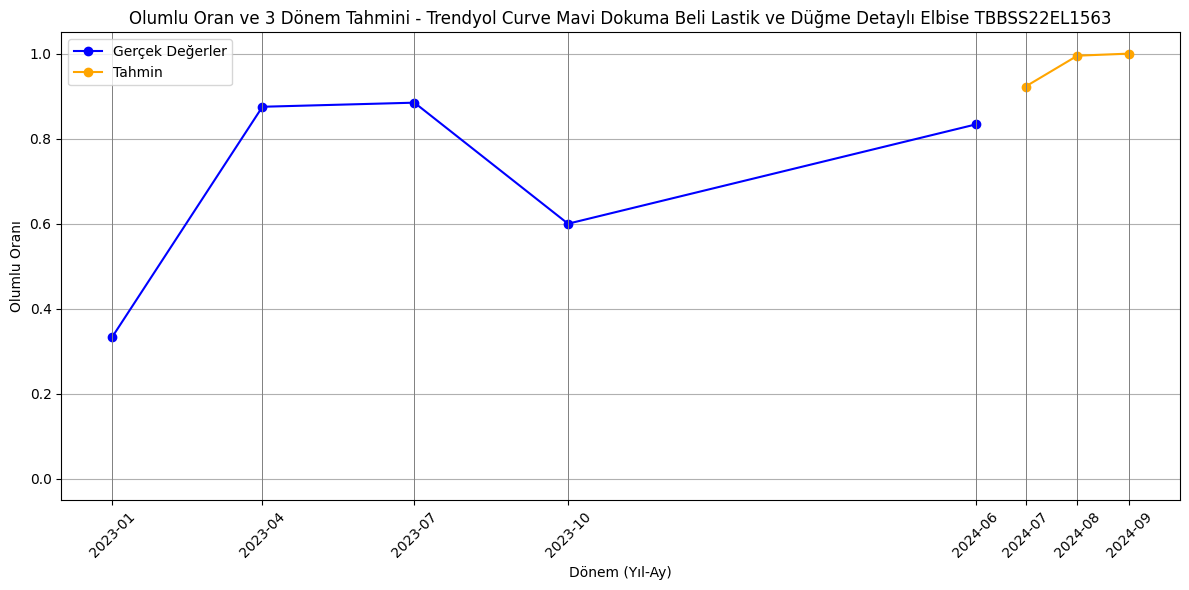

Ürün: TRENDYOLMİLLA Beyaz Skater/Belden Açılan Brode Mini Astarlı Dokuma Elbise TWOSS21EL3680
TRENDYOLMİLLA Beyaz Skater/Belden Açılan Brode Mini Astarlı Dokuma Elbise TWOSS21EL3680 için Holt-Winters (Additive Seasonal) uygulanıyor.


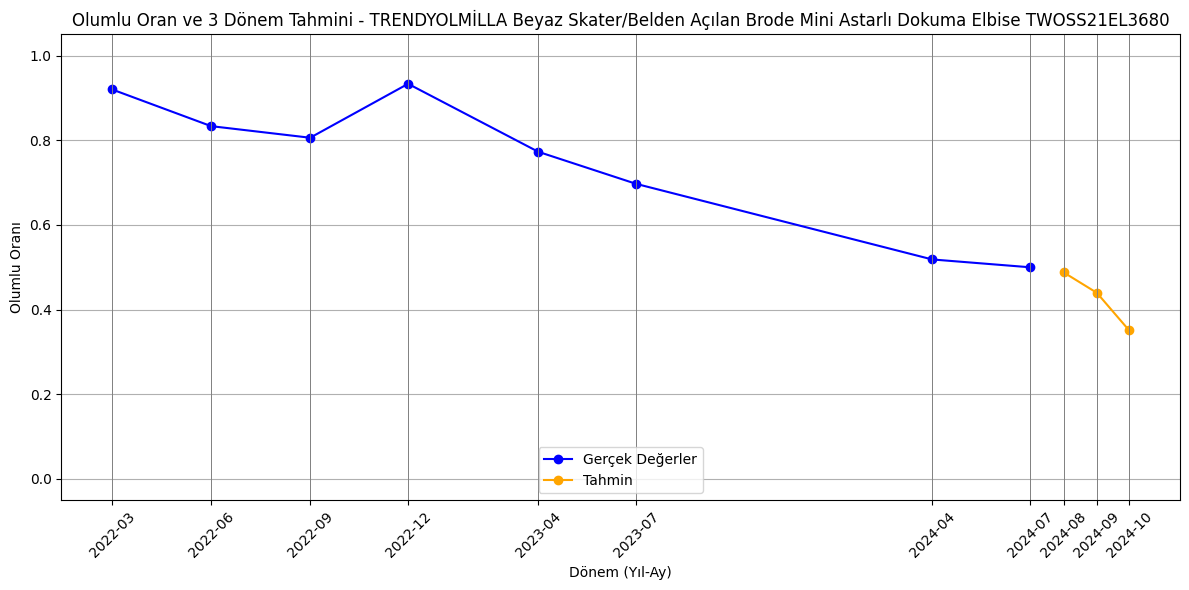

Ürün: TRENDYOLMİLLA Beyaz A Kesim Yaka Detaylı Brode Mini Astarlı Dokuma Elbise TWOSS21EL2089
TRENDYOLMİLLA Beyaz A Kesim Yaka Detaylı Brode Mini Astarlı Dokuma Elbise TWOSS21EL2089 için Holt-Winters (Additive Seasonal) uygulanıyor.


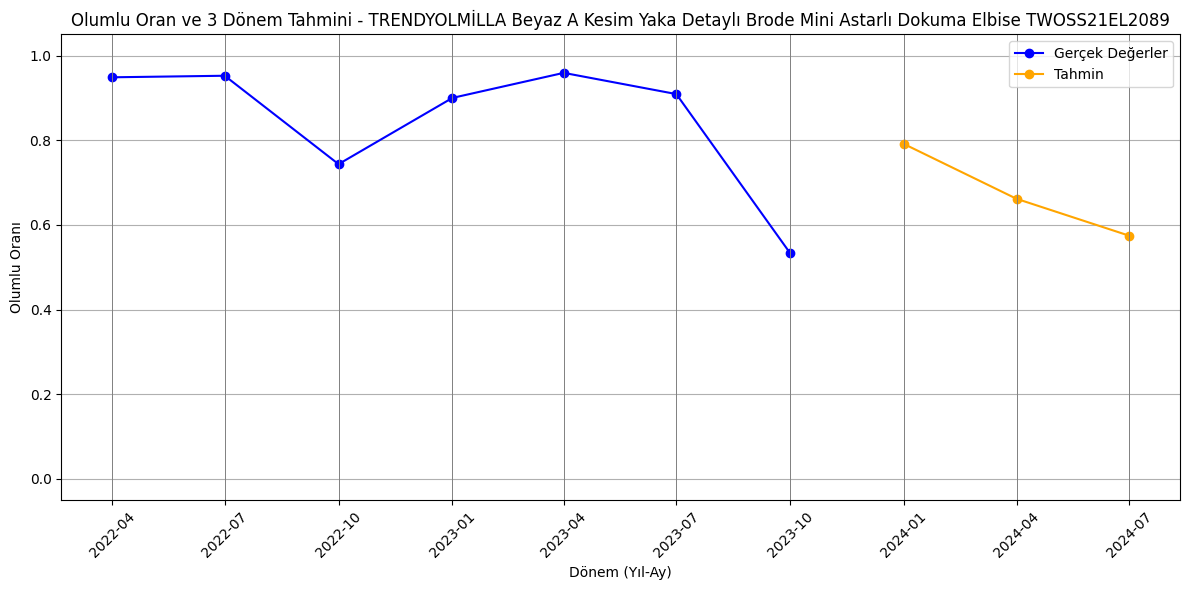

Ürün: TRENDYOLMİLLA Siyah Mini Triko Pileli Etek Detaylı Elbise TWOAW24EL00013
TRENDYOLMİLLA Siyah Mini Triko Pileli Etek Detaylı Elbise TWOAW24EL00013 için dönem sayısı sezonluk model için yetersiz (5 dönem). Trend + Level uygulanacak.


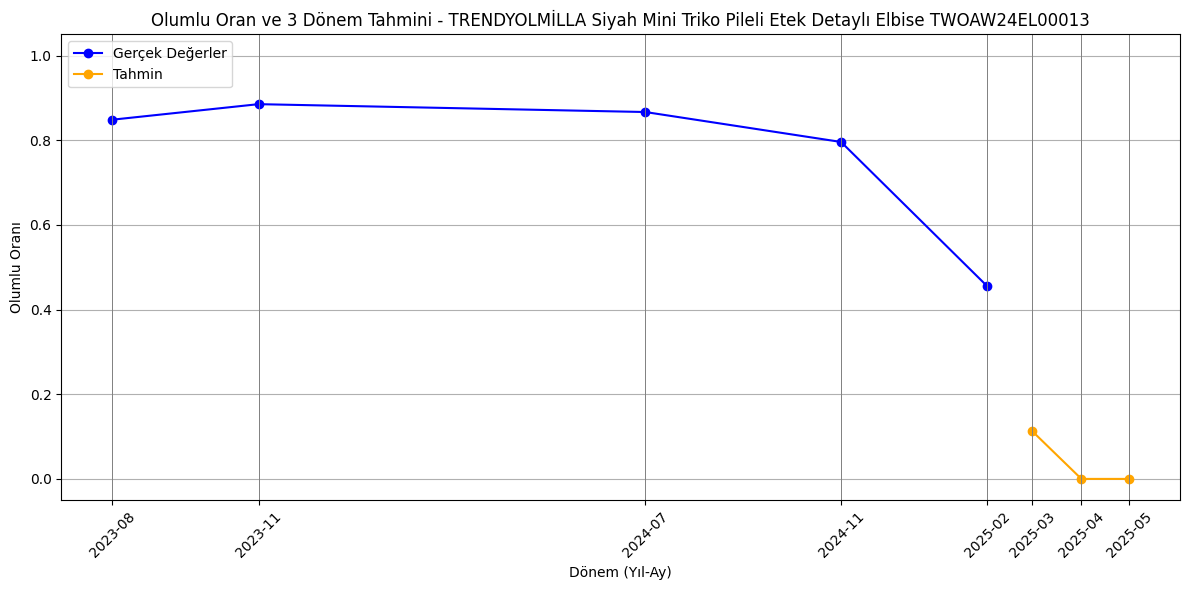

Ürün: TRENDYOLMİLLA Siyah Eteği Volanlı A Kesim Şifon Midi Astarlı Dokuma Elbise TWOSS22EL00733
TRENDYOLMİLLA Siyah Eteği Volanlı A Kesim Şifon Midi Astarlı Dokuma Elbise TWOSS22EL00733 için Holt-Winters (Additive Seasonal) uygulanıyor.


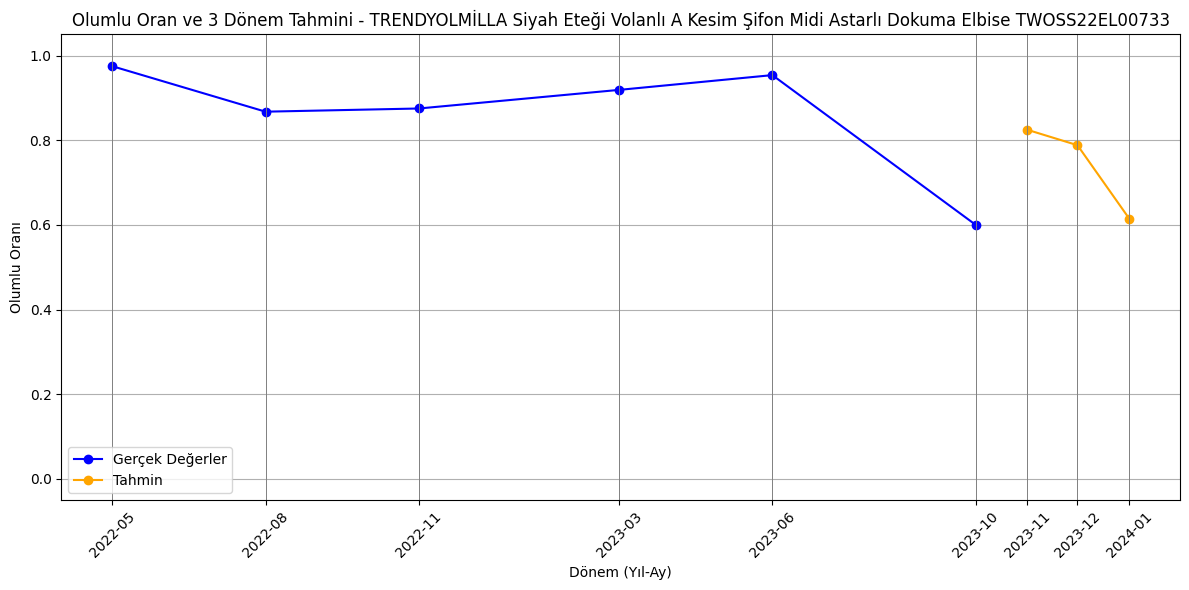

Ürün: TRENDYOLMİLLA Haki Gömlek Yaka Dokuma Elbise TWOAW21EL1964
TRENDYOLMİLLA Haki Gömlek Yaka Dokuma Elbise TWOAW21EL1964 için Holt-Winters (Additive Seasonal) uygulanıyor.


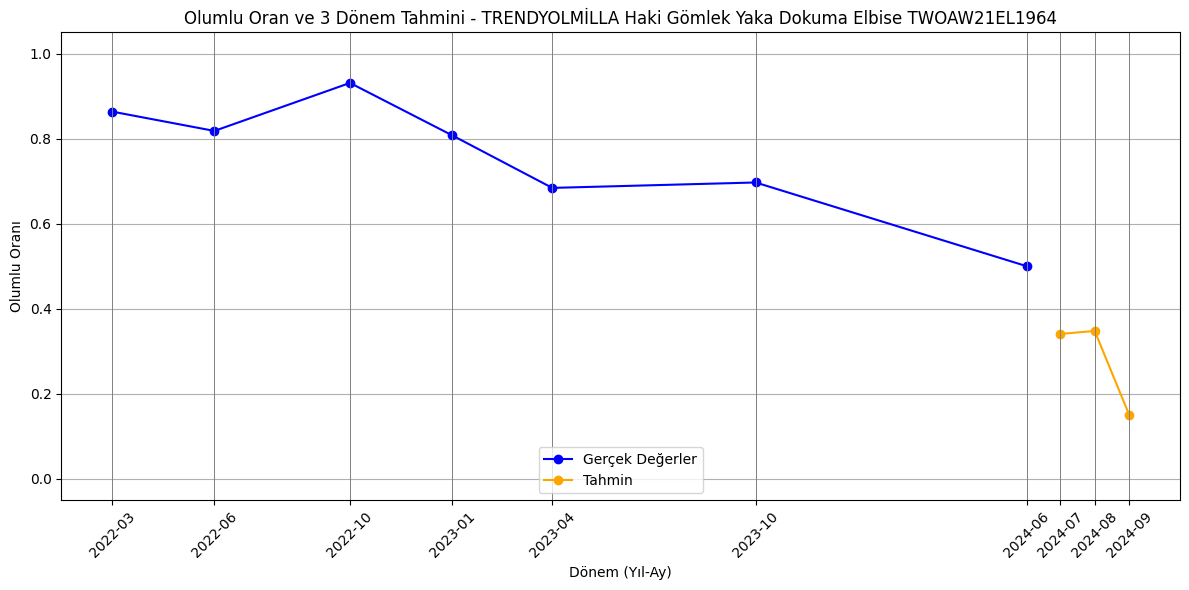

Ürün: TRENDYOLMİLLA Beyaz Dokuma %100 Pamuk Mini Plaj Elbisesi TBESS21EL3979
TRENDYOLMİLLA Beyaz Dokuma %100 Pamuk Mini Plaj Elbisesi TBESS21EL3979 için Holt-Winters (Additive Seasonal) uygulanıyor.


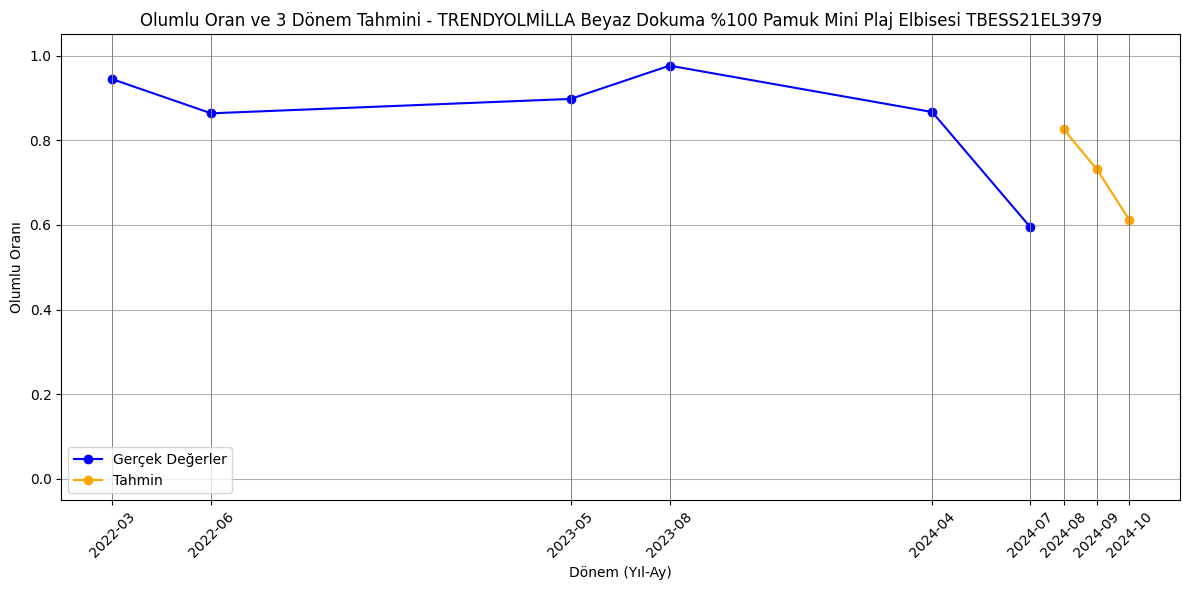

Ürün: TRENDYOLMİLLA Taş Kuşaklı A Kesim Mini Kruvaze Yaka Dokuma Keten Görünümlü Elbise TWOSS19XN0008
TRENDYOLMİLLA Taş Kuşaklı A Kesim Mini Kruvaze Yaka Dokuma Keten Görünümlü Elbise TWOSS19XN0008 için Holt-Winters (Additive Seasonal) uygulanıyor.


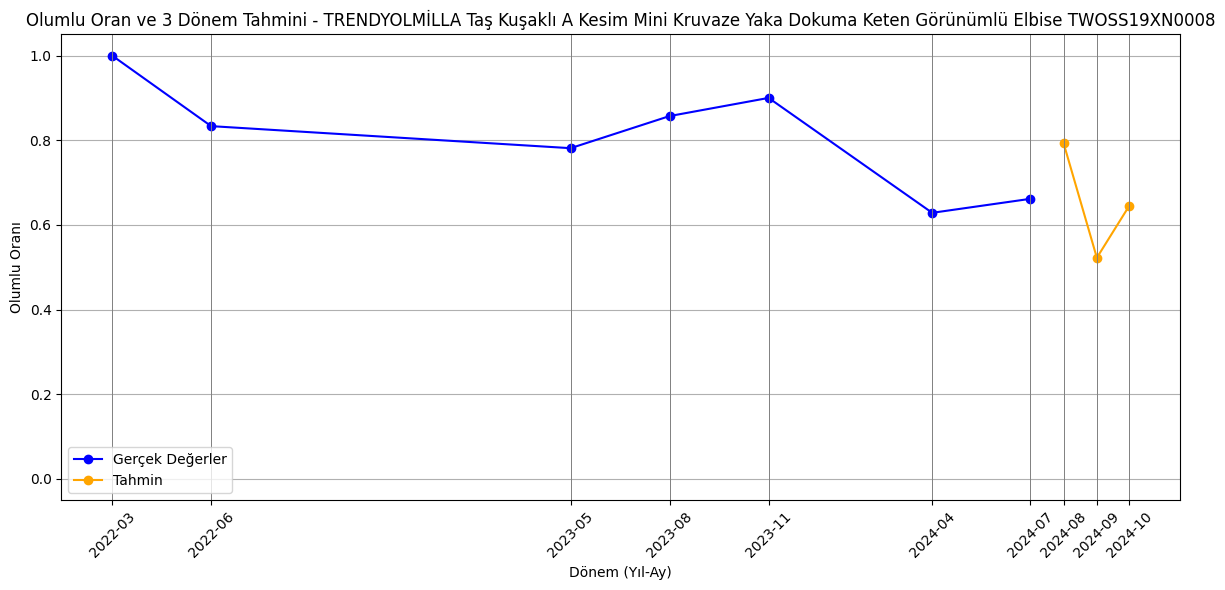

Ürün: TRENDYOLMİLLA Lacivert Kuşaklı Yırtmaçlı Çiçek Desenli Midi Dokuma Gömlek Elbise TWOSS20EL2822
TRENDYOLMİLLA Lacivert Kuşaklı Yırtmaçlı Çiçek Desenli Midi Dokuma Gömlek Elbise TWOSS20EL2822 için Holt-Winters (Additive Seasonal) uygulanıyor.


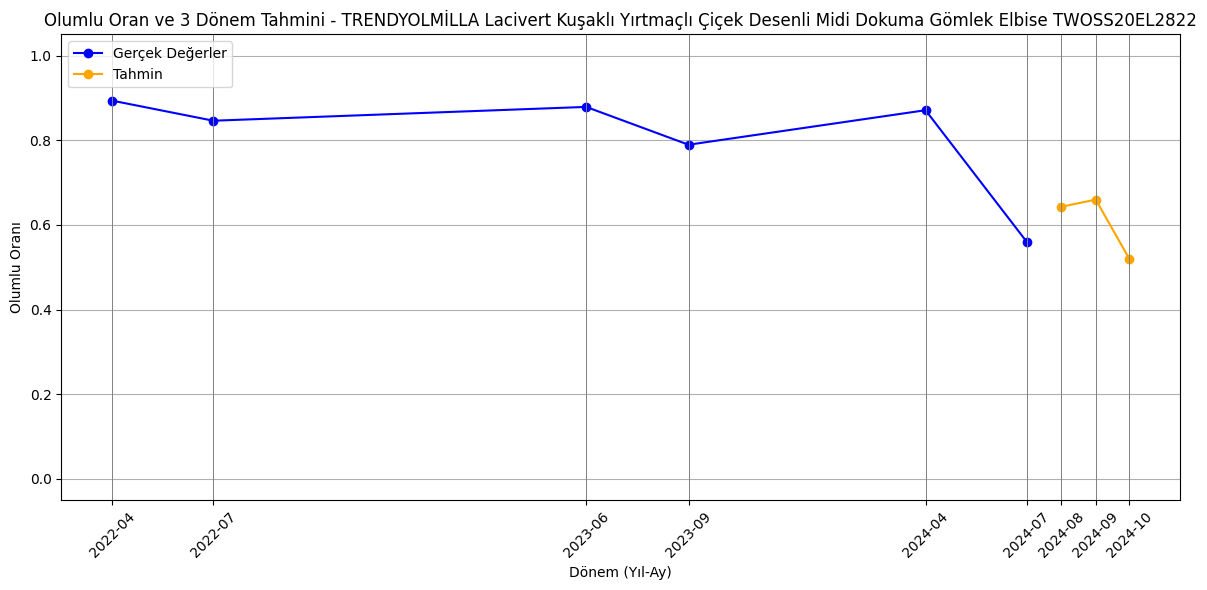

Ürün: TRENDYOLMİLLA Siyah Vücuda Oturan Gipeli Mini Dokuma Elbise TWOSS23EL00892
TRENDYOLMİLLA Siyah Vücuda Oturan Gipeli Mini Dokuma Elbise TWOSS23EL00892 için dönem sayısı sezonluk model için yetersiz (4 dönem). Trend + Level uygulanacak.


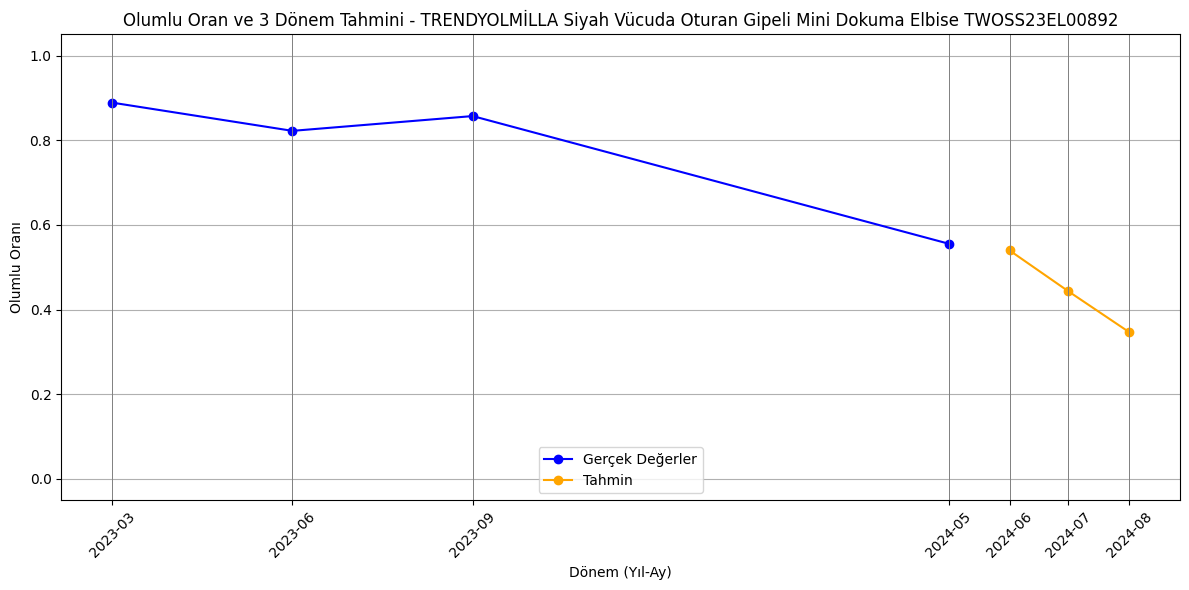

Ürün: TRENDYOLMİLLA Çok Renkli Çiçek Desenli Belden Açılan Mini Astarlı Şifon Dokuma Elbise TWOAW24EL00841
TRENDYOLMİLLA Çok Renkli Çiçek Desenli Belden Açılan Mini Astarlı Şifon Dokuma Elbise TWOAW24EL00841 için dönem sayısı sezonluk model için yetersiz (5 dönem). Trend + Level uygulanacak.


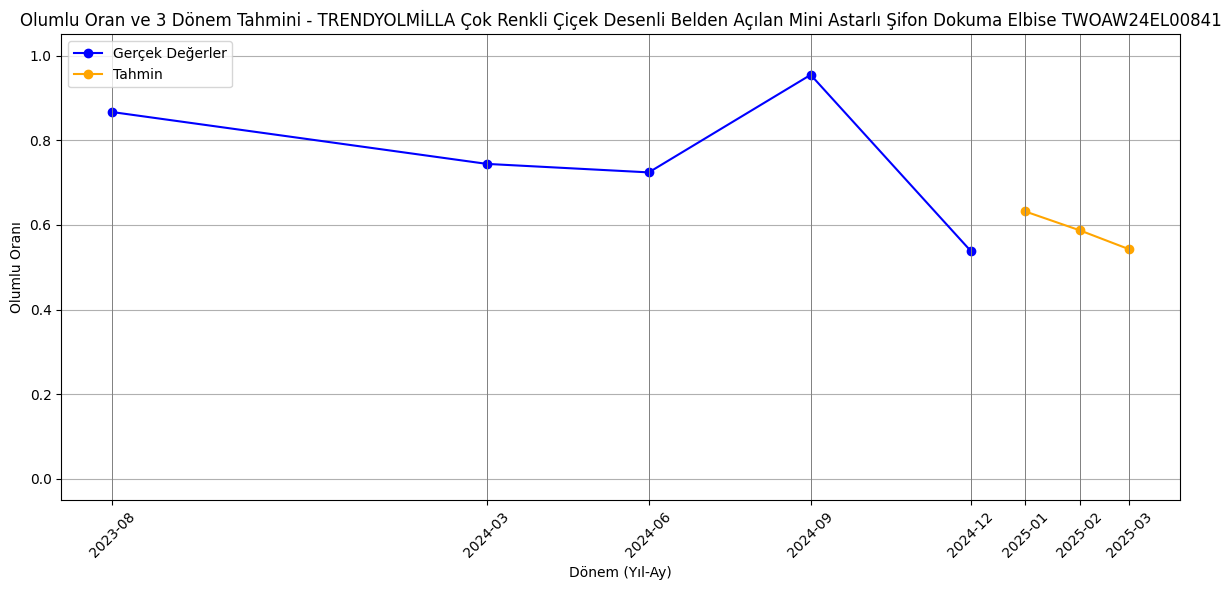

Ürün: TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488
TRENDYOLMİLLA Siyah Kruvaze Bağlama Detaylı Mini Mono Desenli Dokuma Elbise TWOAW24EL00488 için dönem sayısı sezonluk model için yetersiz (4 dönem). Trend + Level uygulanacak.


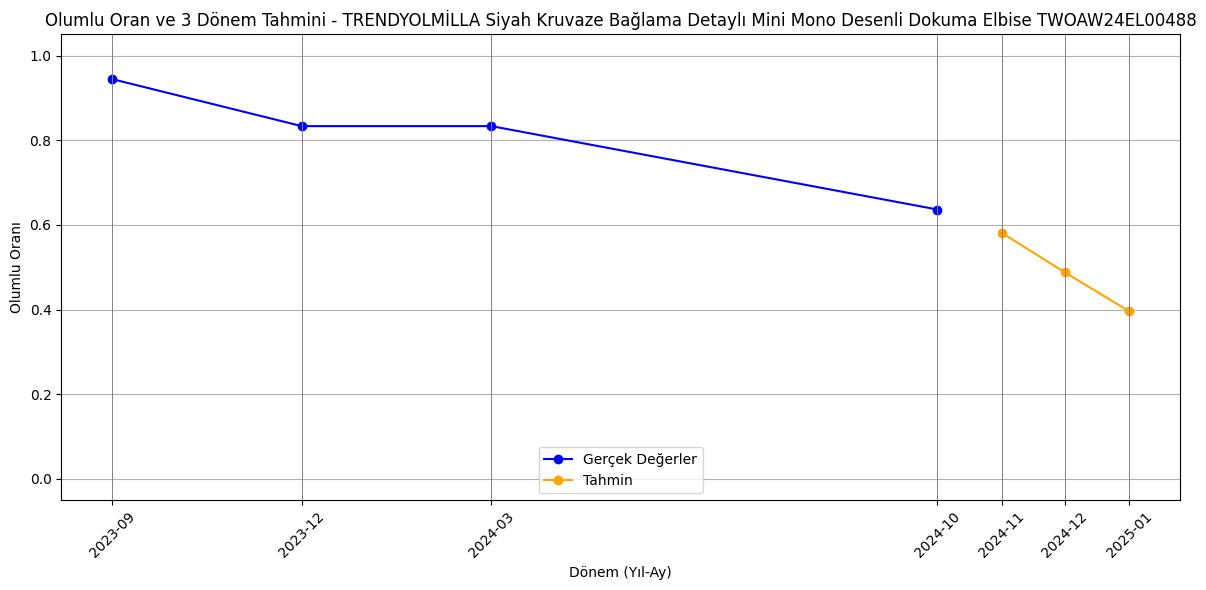

Ürün: TRENDYOLMİLLA Siyah Düğme Detaylı Kolsuz Dokuma Mini Ceket Elbise TWOSS19AP0280
TRENDYOLMİLLA Siyah Düğme Detaylı Kolsuz Dokuma Mini Ceket Elbise TWOSS19AP0280 için Holt-Winters (Additive Seasonal) uygulanıyor.


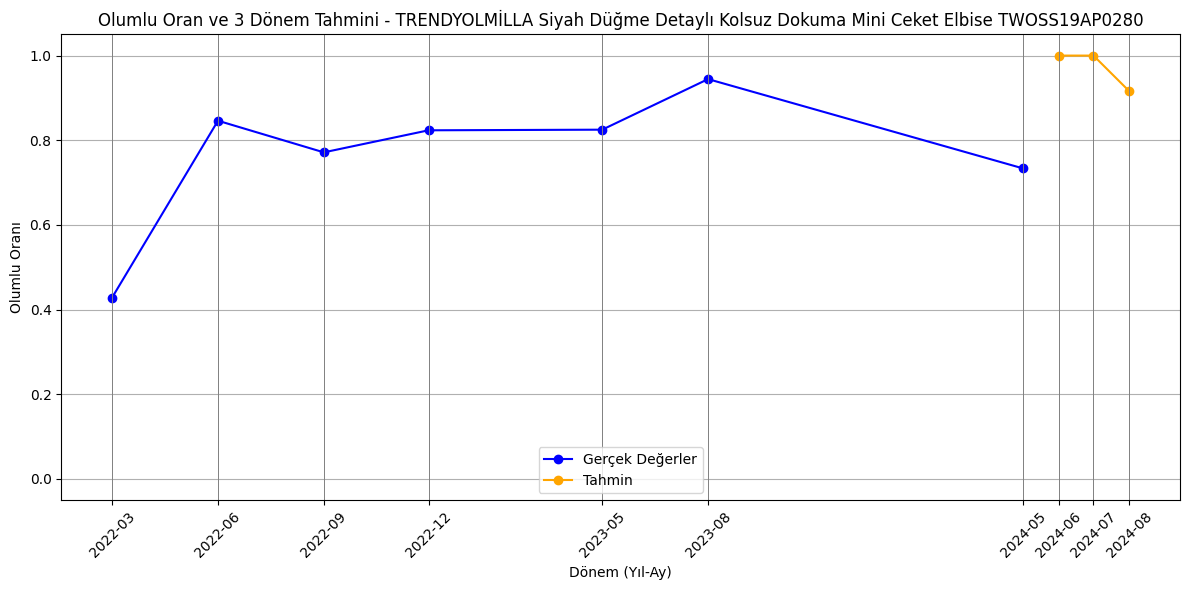

Ürün: TRENDYOLMİLLA Mavi Dikiş Detaylı Fitted/Vücuda Oturan Mini Denim Elbise TWOSS24EL00284
TRENDYOLMİLLA Mavi Dikiş Detaylı Fitted/Vücuda Oturan Mini Denim Elbise TWOSS24EL00284 için dönem sayısı sezonluk model için yetersiz (4 dönem). Trend + Level uygulanacak.


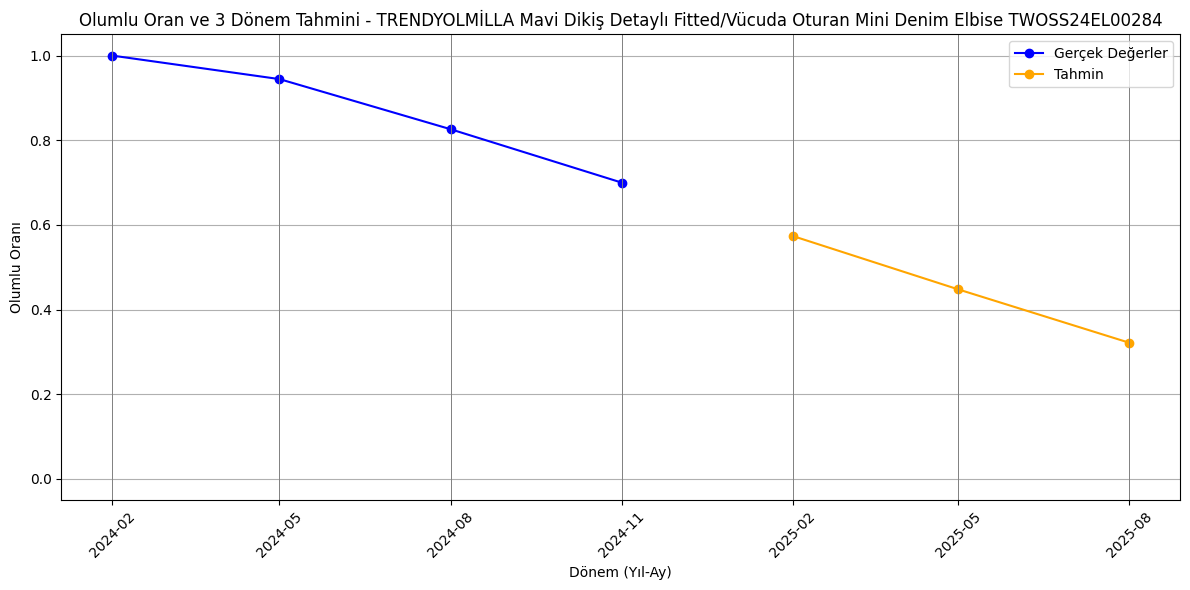

Ürün: TRENDYOLMİLLA Limited Edition Pembe Kareli Midi Dokuma Ceket Elbise TWOSS21EL3581
TRENDYOLMİLLA Limited Edition Pembe Kareli Midi Dokuma Ceket Elbise TWOSS21EL3581 için Holt-Winters (Additive Seasonal) uygulanıyor.


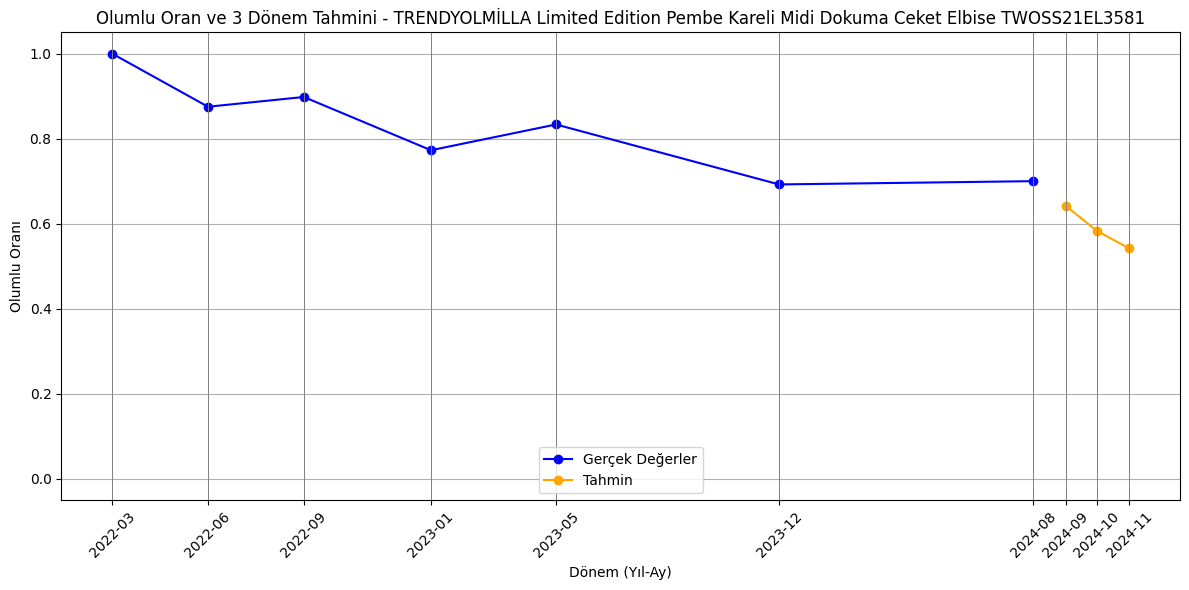

Ürün: TRENDYOLMİLLA X Sagaza Studio Siyah Belden Açılan/Skater Beli Lastikli Piliseli Poplin Elbise TCLAW24EL00000
TRENDYOLMİLLA X Sagaza Studio Siyah Belden Açılan/Skater Beli Lastikli Piliseli Poplin Elbise TCLAW24EL00000 için dönem sayısı sezonluk model için yetersiz (5 dönem). Trend + Level uygulanacak.


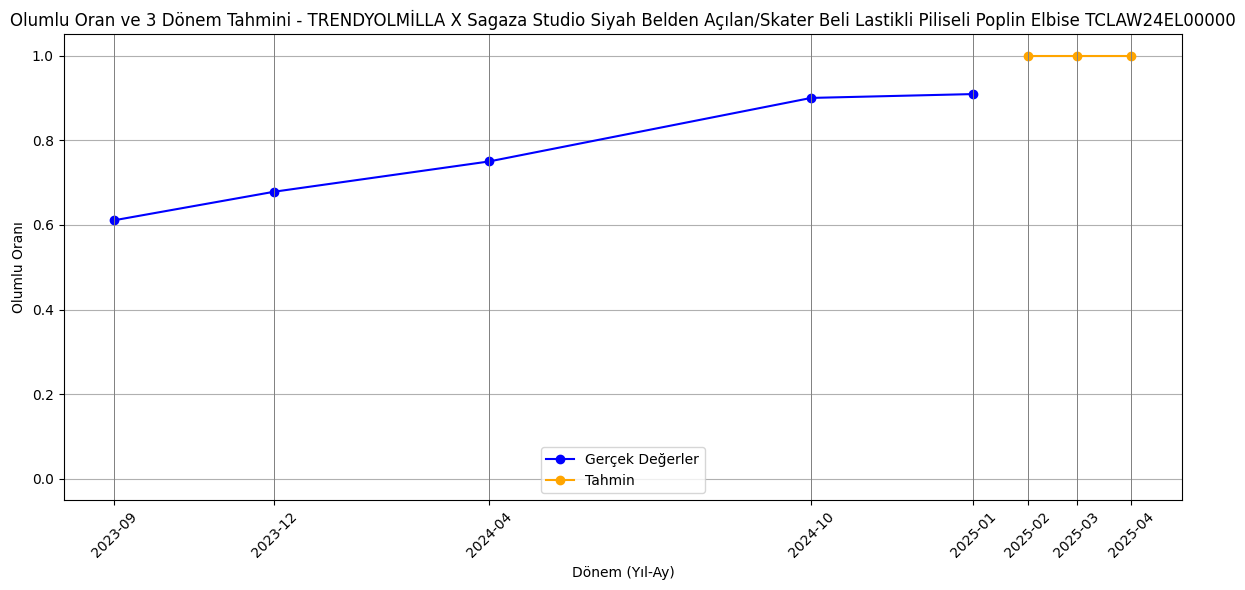

Ürün: TRENDYOLMİLLA Mint Düz Kesim Cepli Gömlek Yaka Keten Görünümlü Mini Dokuma Elbise TWOSS22EL1068
TRENDYOLMİLLA Mint Düz Kesim Cepli Gömlek Yaka Keten Görünümlü Mini Dokuma Elbise TWOSS22EL1068 için Holt-Winters (Additive Seasonal) uygulanıyor.


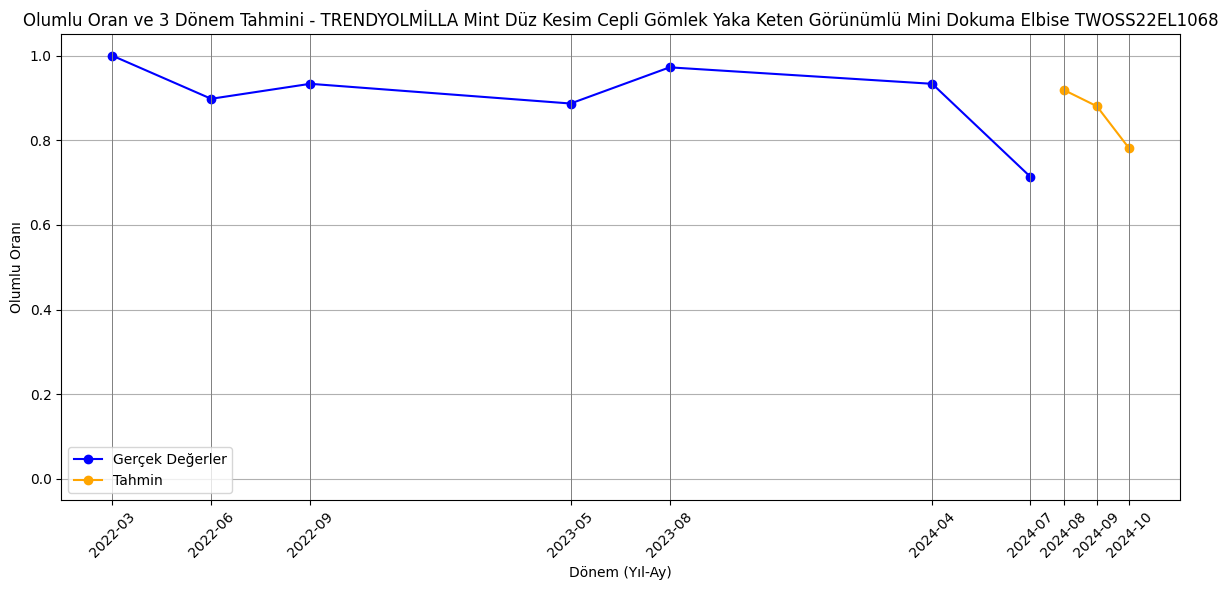

Ürün: Trendyol Curve Siyah Ayarlanabilir Askılı Vücuda Oturan Midi/Orta Boy Dokuma Büyük Beden Elbise TBBSS22AH00039
Trendyol Curve Siyah Ayarlanabilir Askılı Vücuda Oturan Midi/Orta Boy Dokuma Büyük Beden Elbise TBBSS22AH00039 için Holt-Winters (Additive Seasonal) uygulanıyor.


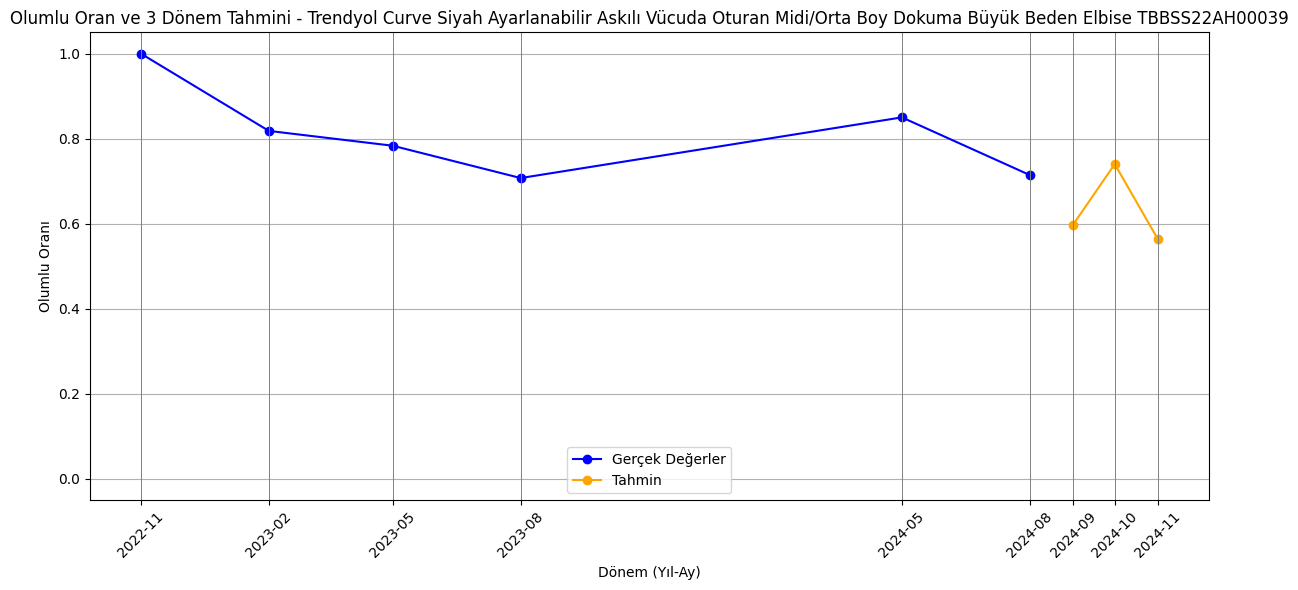

Ürün: TRENDYOLMİLLA Kırmızı Düğme Detaylı Mini Dokuma Ceket Elbise TWOAW24EL00462
TRENDYOLMİLLA Kırmızı Düğme Detaylı Mini Dokuma Ceket Elbise TWOAW24EL00462 için dönem sayısı sezonluk model için yetersiz (5 dönem). Trend + Level uygulanacak.


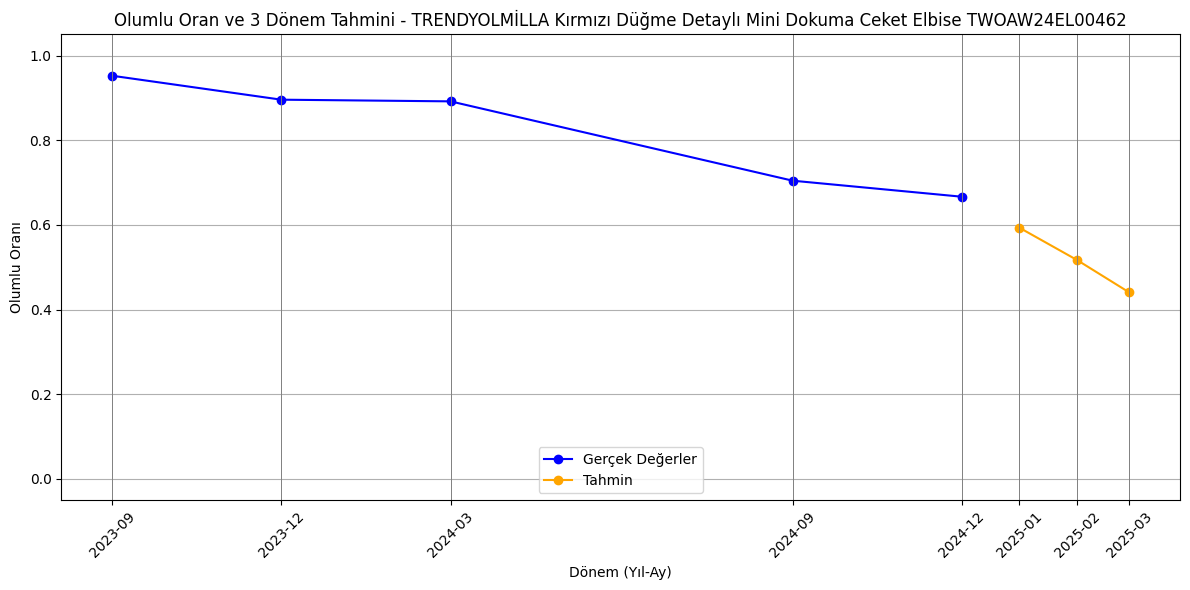

Ürün: TRENDYOLMİLLA Siyah Dokuma Püsküllü Cut Out/Pencere Maxi Plaj Elbisesi TBESS21EL3624
TRENDYOLMİLLA Siyah Dokuma Püsküllü Cut Out/Pencere Maxi Plaj Elbisesi TBESS21EL3624 için Holt-Winters (Additive Seasonal) uygulanıyor.


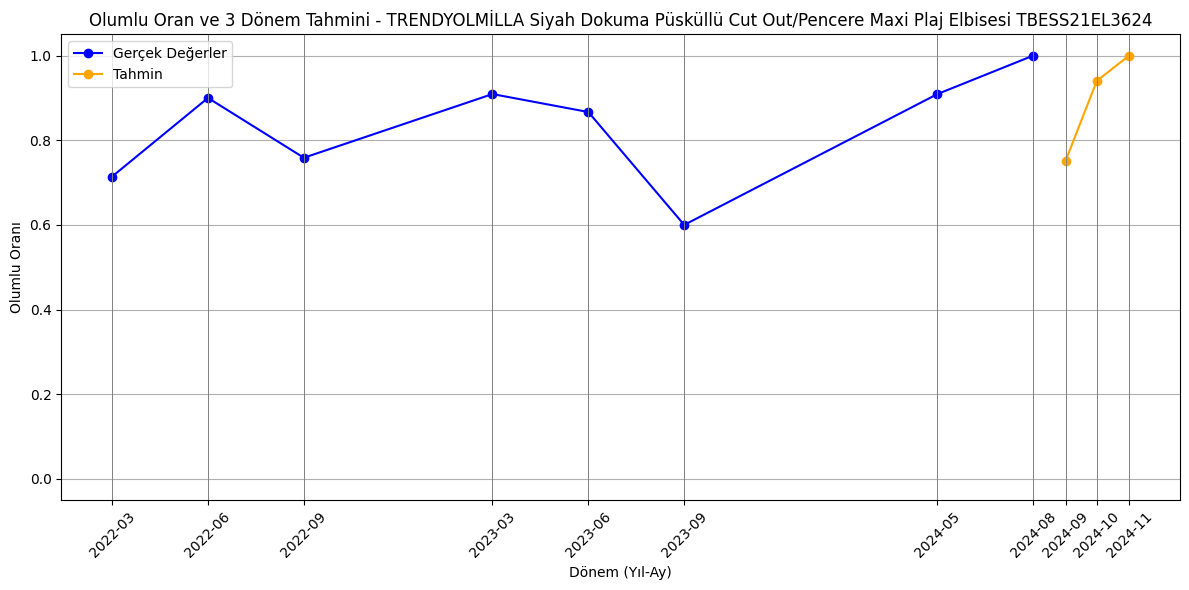

Ürün: TRENDYOLMİLLA Çiçek Desenli Mini Dokuma Cut Out/Pencere Plaj Elbisesi TBESS21EL1054
TRENDYOLMİLLA Çiçek Desenli Mini Dokuma Cut Out/Pencere Plaj Elbisesi TBESS21EL1054 için Holt-Winters (Additive Seasonal) uygulanıyor.


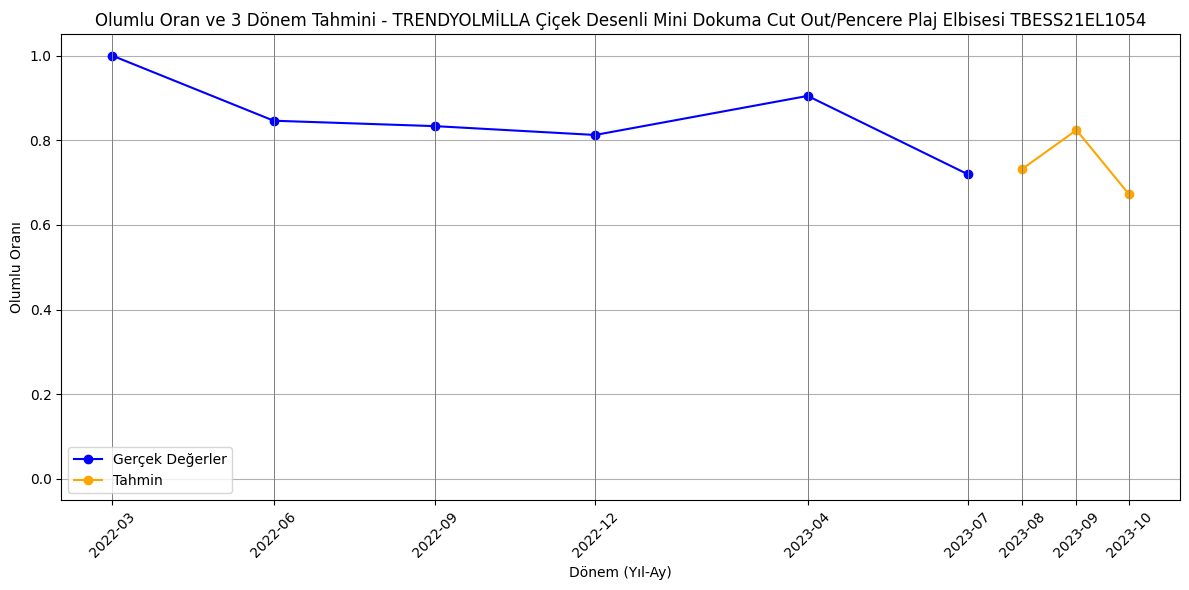

Ürün: TRENDYOLMİLLA Lacivert Maxi Triko Polo Yaka Elbise TWOSS24EL00282
TRENDYOLMİLLA Lacivert Maxi Triko Polo Yaka Elbise TWOSS24EL00282 için dönem sayısı sezonluk model için yetersiz (4 dönem). Trend + Level uygulanacak.


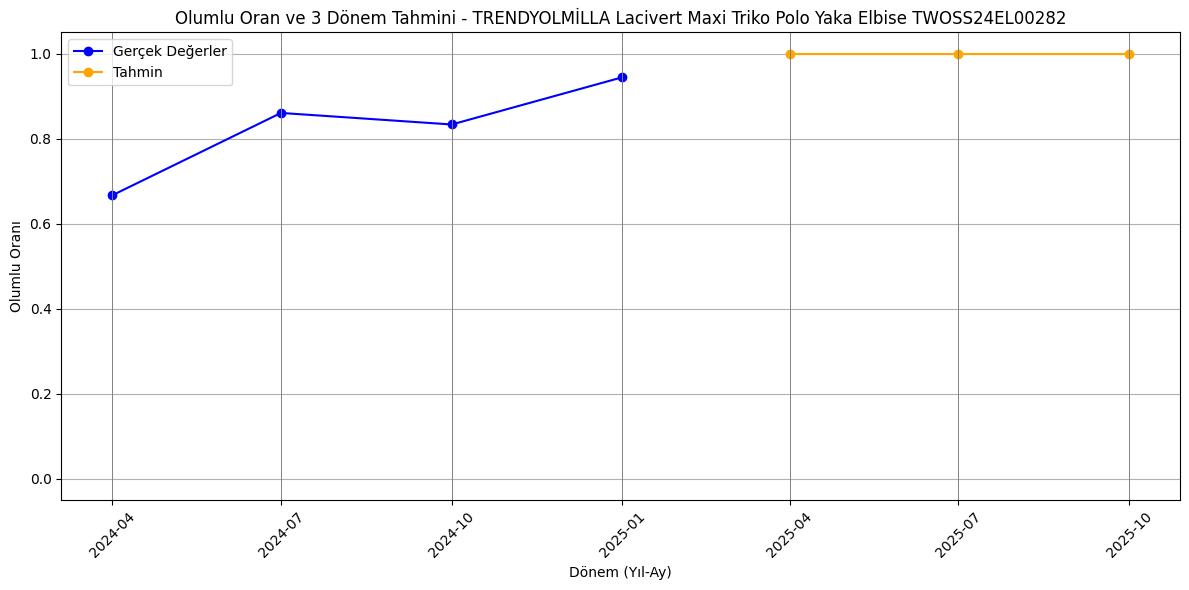

Ürün: TRENDYOLMİLLA Siyah Vücudu Saran Gömlek Yaka Mini Dokuma Elbise TWOAW23EL00611
TRENDYOLMİLLA Siyah Vücudu Saran Gömlek Yaka Mini Dokuma Elbise TWOAW23EL00611 için Holt-Winters (Additive Seasonal) uygulanıyor.


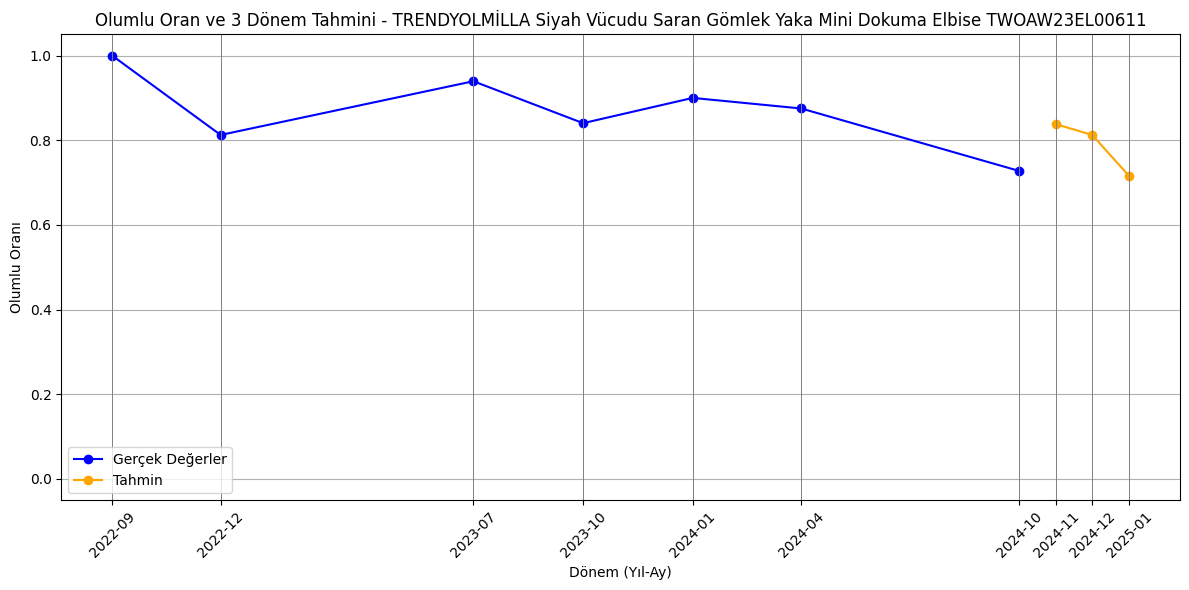

Ürün: TRENDYOLMİLLA Bridal Beyaz A-Kesim Straplez Dokuma Düğün/Nikah Abiye Elbise TPRSS24EL00139
TRENDYOLMİLLA Bridal Beyaz A-Kesim Straplez Dokuma Düğün/Nikah Abiye Elbise TPRSS24EL00139 için dönem sayısı sezonluk model için yetersiz (4 dönem). Trend + Level uygulanacak.


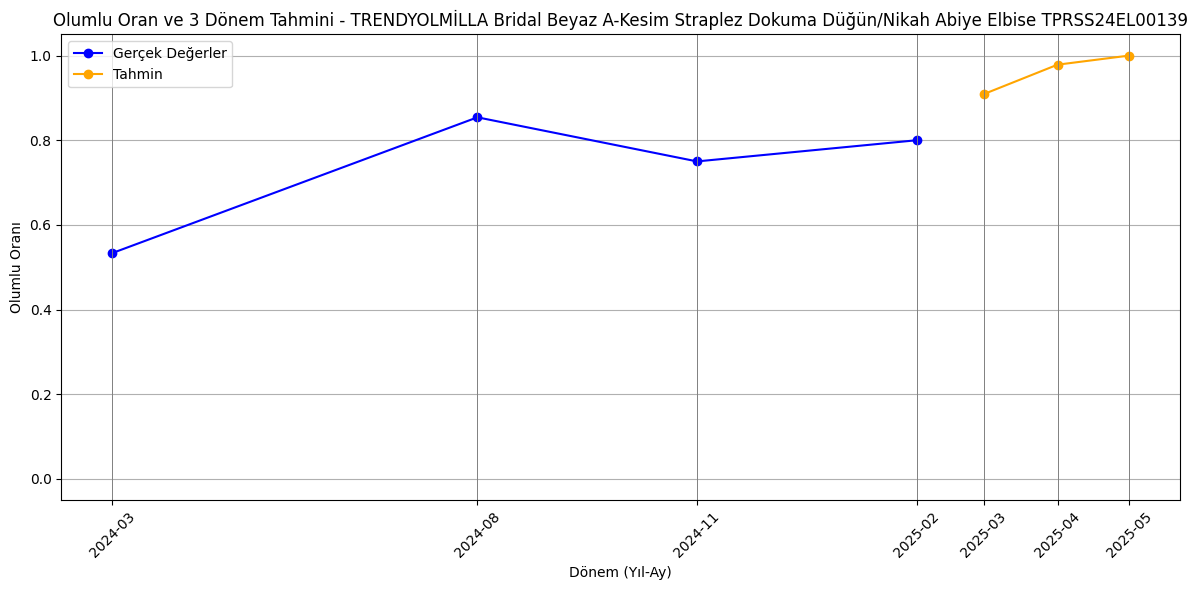

In [21]:
for urun in urunler:
    print(f"Ürün: {urun}")
    exponential_smoothing_tahmin_3ay(df_product_periodic, urun)